In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
dataset = pd.read_csv("machine learning.txt/OnlineNewsPopularity.csv")
df = pd.DataFrame(dataset)

In [84]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


### Data Preprocessing

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [89]:
df.shape

(39644, 61)

In [91]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


#### Finding Missing values

In [94]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


In [96]:
df2 = df.drop_duplicates()
print(df.duplicated().sum())

0


### Otlier handling

In [99]:
skewness = df.select_dtypes(include=['float64', 'int64']).skew()
print(skewness)

 timedelta                          0.120504
 n_tokens_title                     0.165320
 n_tokens_content                   2.945422
 n_unique_tokens                  198.655116
 n_non_stop_words                 198.792445
 n_non_stop_unique_tokens         198.443294
 num_hrefs                          4.013495
 num_self_hrefs                     5.172751
 num_imgs                           3.946596
 num_videos                         7.019533
 average_token_length              -4.576012
 num_keywords                      -0.147251
 data_channel_is_lifestyle          3.993019
 data_channel_is_entertainment      1.683585
 data_channel_is_bus                1.876870
 data_channel_is_socmed             3.758880
 data_channel_is_tech               1.619976
 data_channel_is_world              1.405169
 kw_min_min                         2.374947
 kw_max_min                        35.328434
 kw_avg_min                        31.306108
 kw_min_max                        10.386372
 kw_max_ma

In [101]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox



def handle_skewness(df, threshold=0.5):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_cols:  # Iterate over numerical columns
        skewness = df[column].skew() # Calculate skewness for individual column

        if skewness > threshold:
            # Positively skewed: apply log or sqrt
            if (df[column] > 0).all():  # Ensure there are no zero or negative values
                df[column] = np.log1p(df[column])  # log(1 + value)
            else:
                df[column] = np.sqrt(df[column])  # Square root transformation

        elif skewness < -threshold:
            # Negatively skewed: apply square or Box-Cox
            if (df[column] >= 0).all():  # Ensure non-negative values for Box-Cox
                df[column], _ = boxcox(df[column] + 1)  # Add 1 to avoid zero values
            else:
                df[column] = df[column] ** 2  # Square the values

        # No action for moderately skewed data (-0.5 < skewness < 0.5)

    return df

# Apply to your dataset
data_transformed = handle_skewness(df)

C:\Users\Najma\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [103]:
df1 = data_transformed 
df1.shape

(39644, 61)

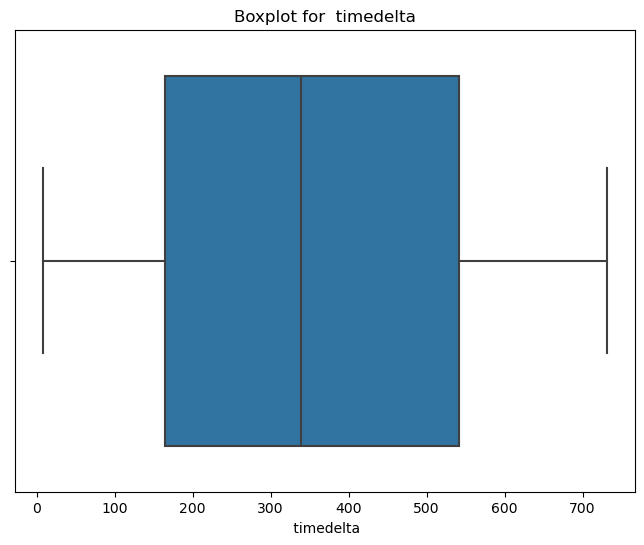

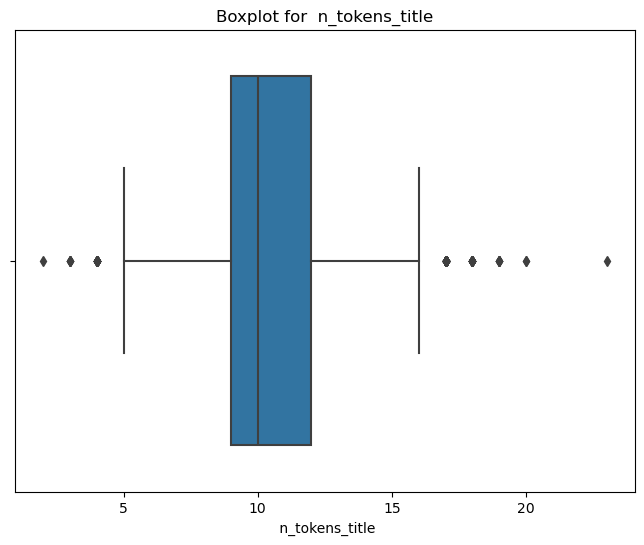

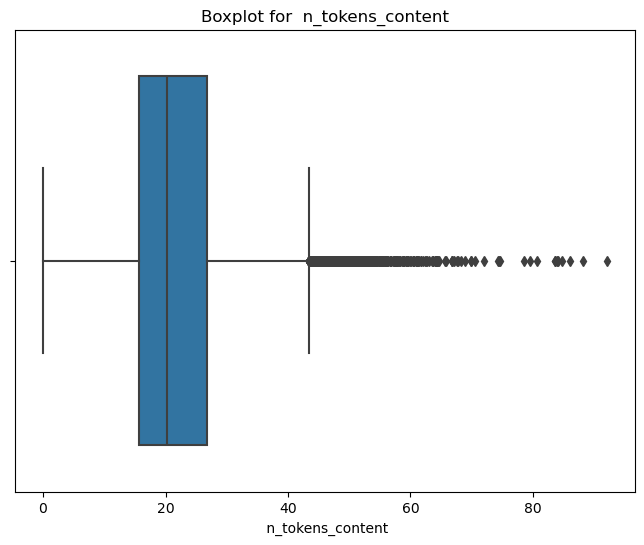

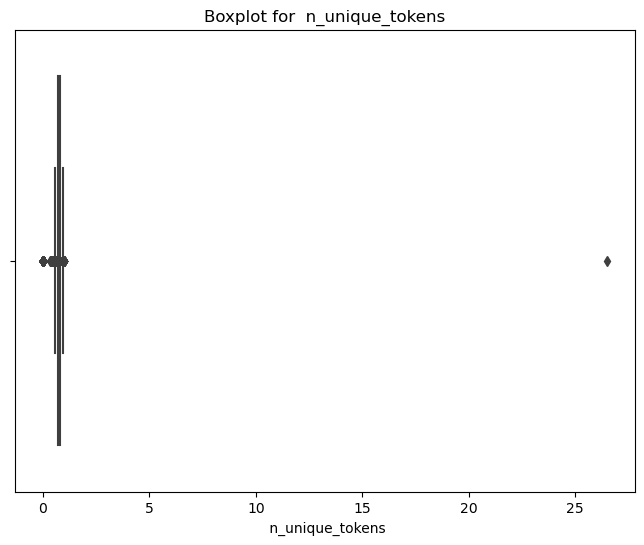

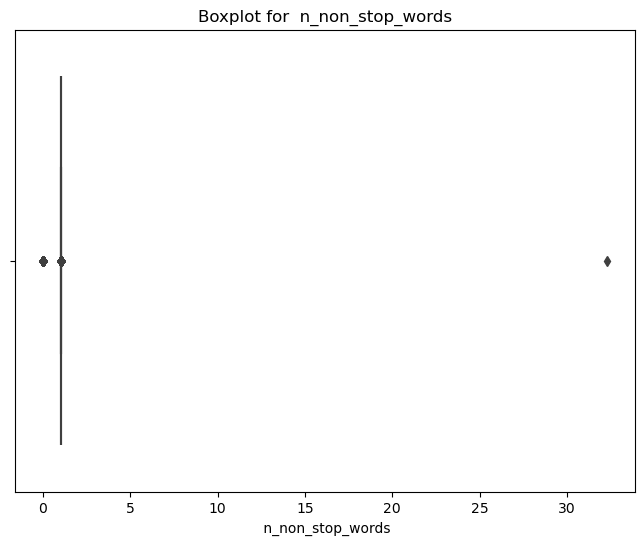

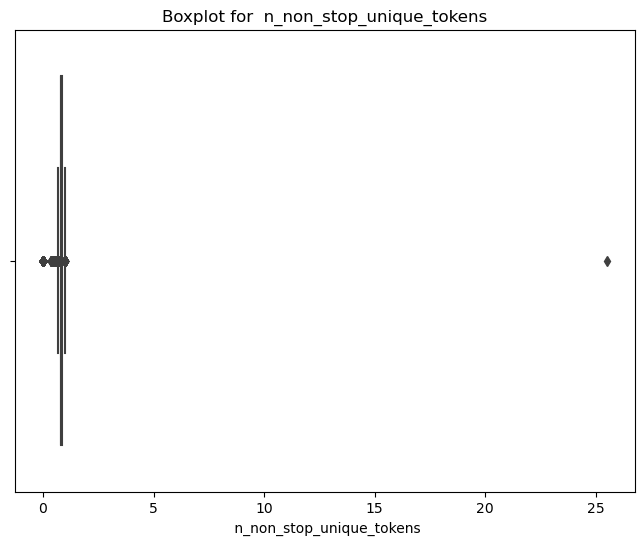

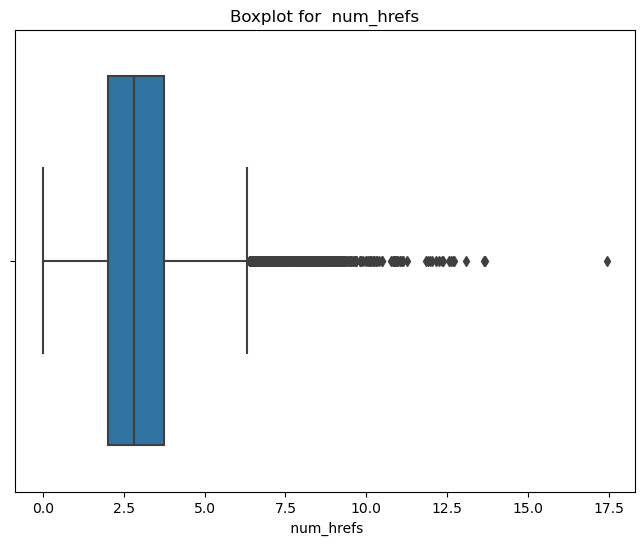

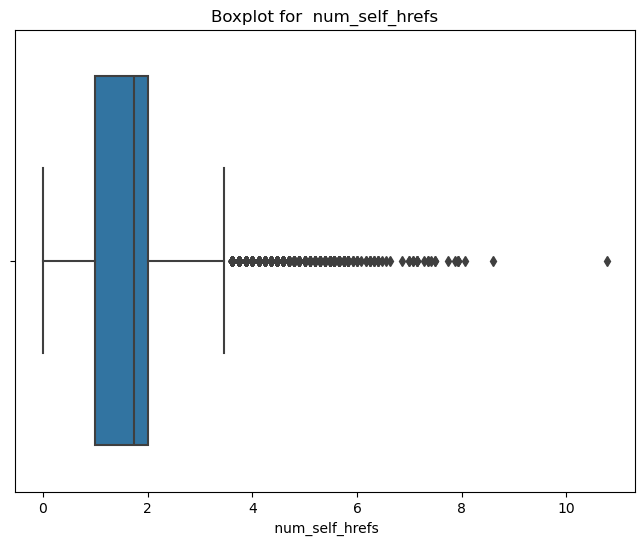

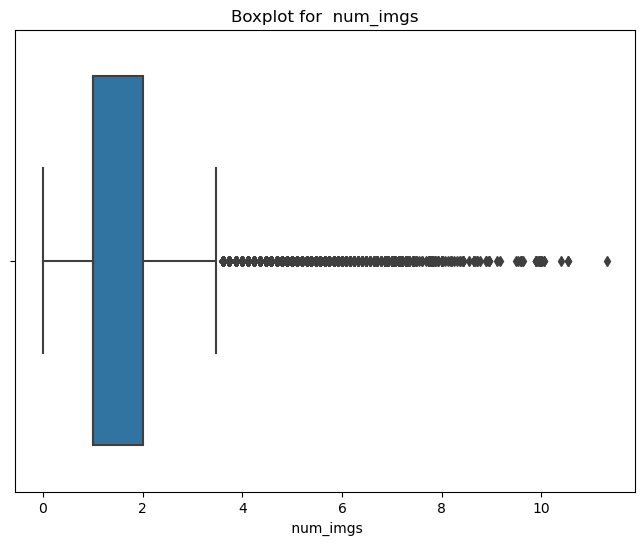

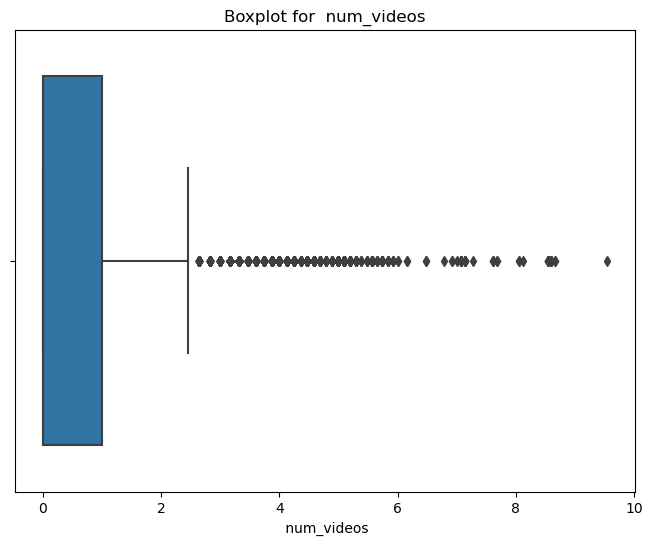

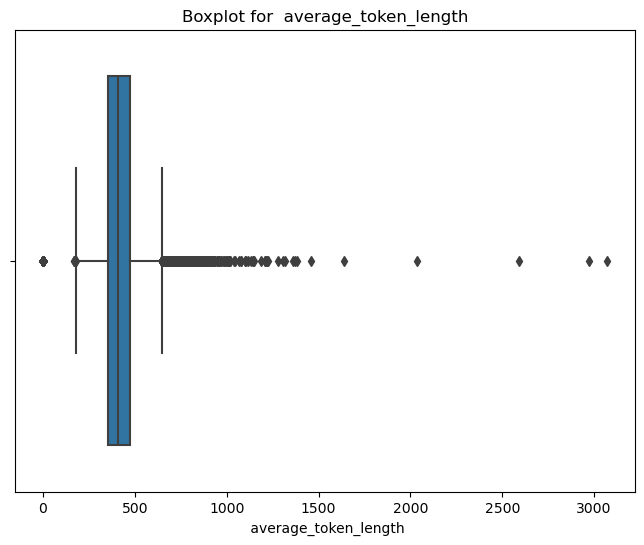

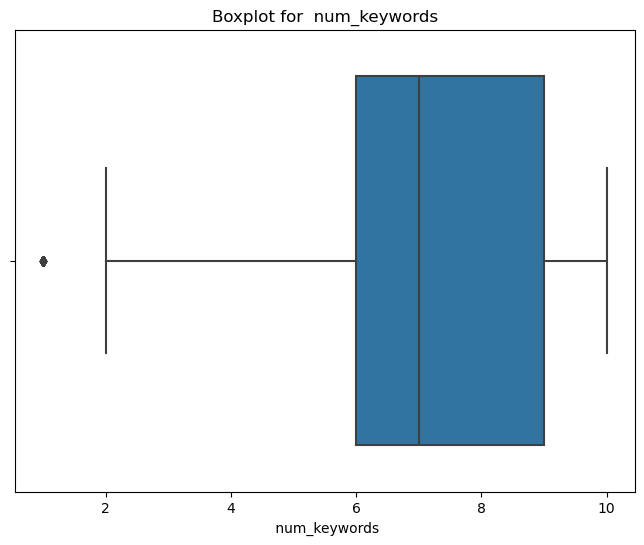

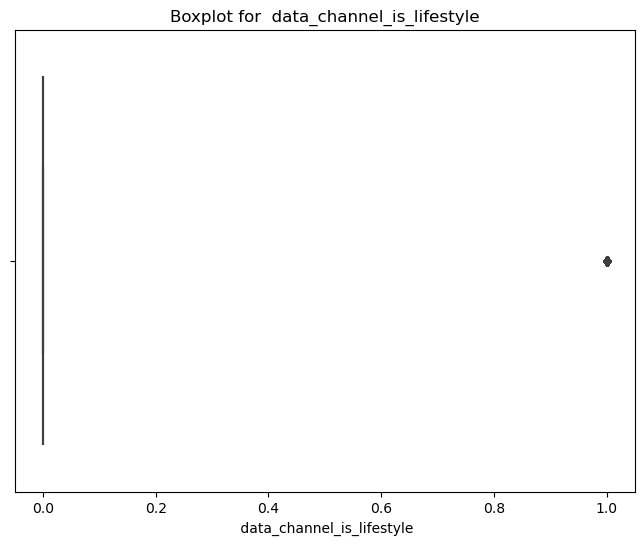

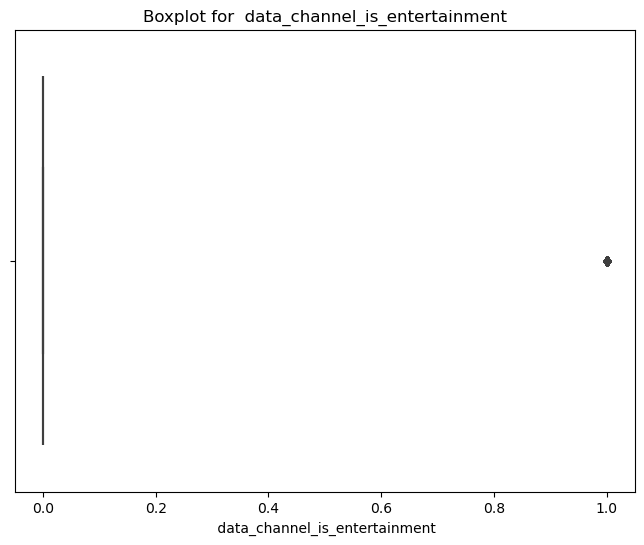

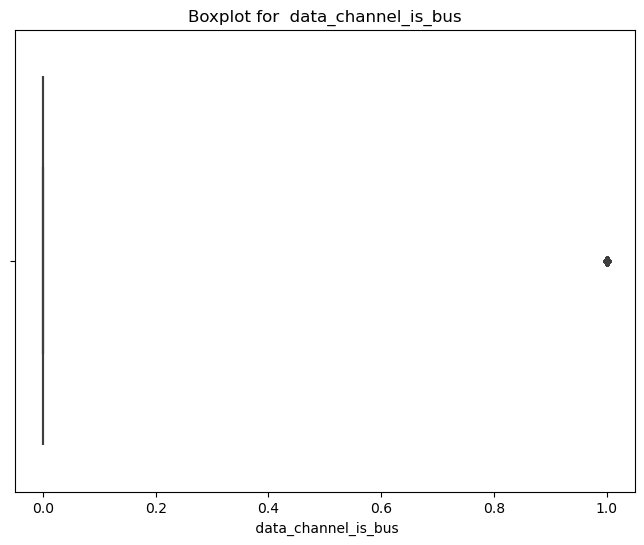

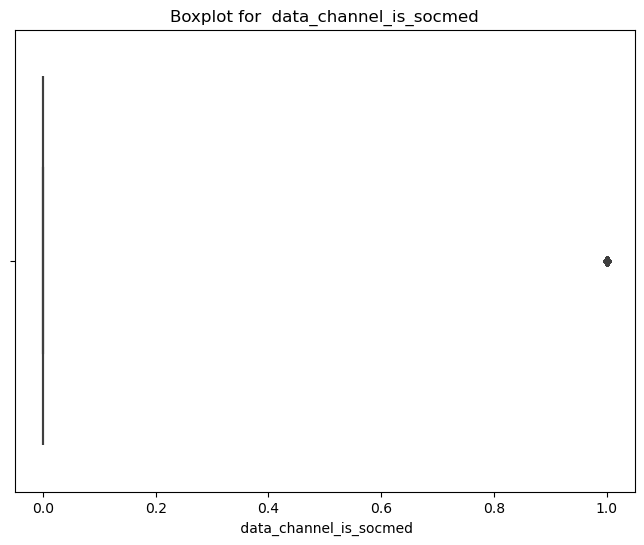

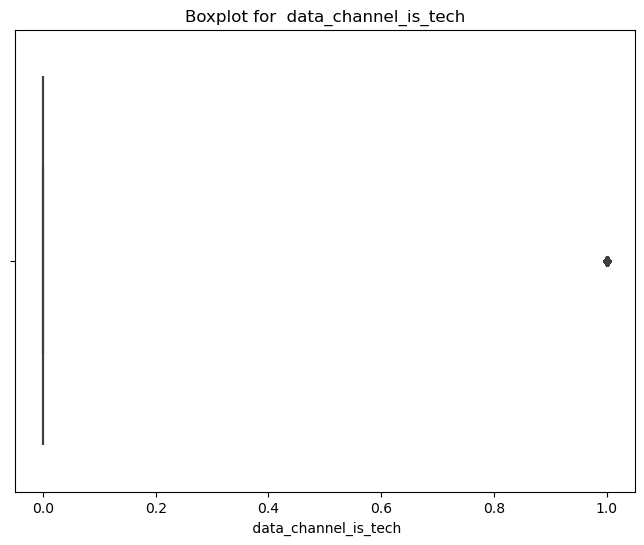

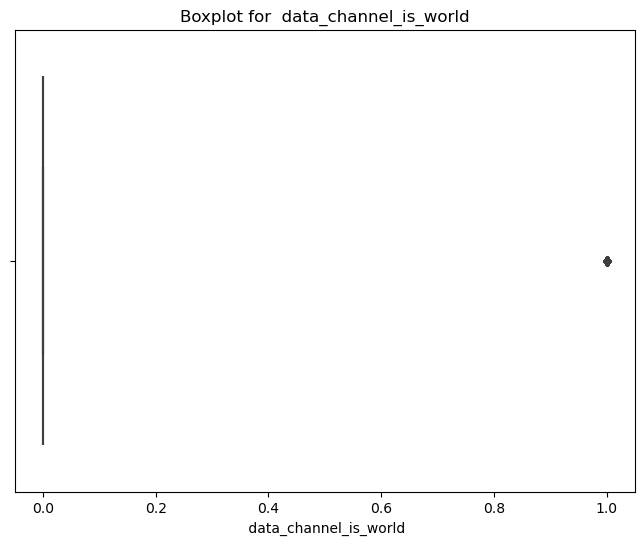

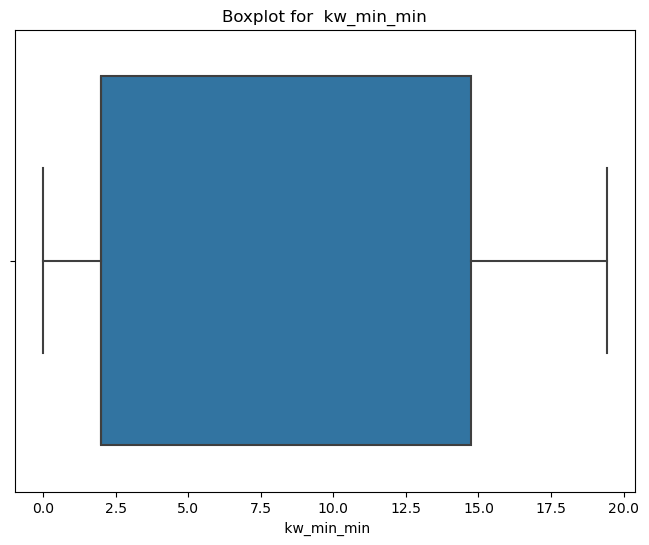

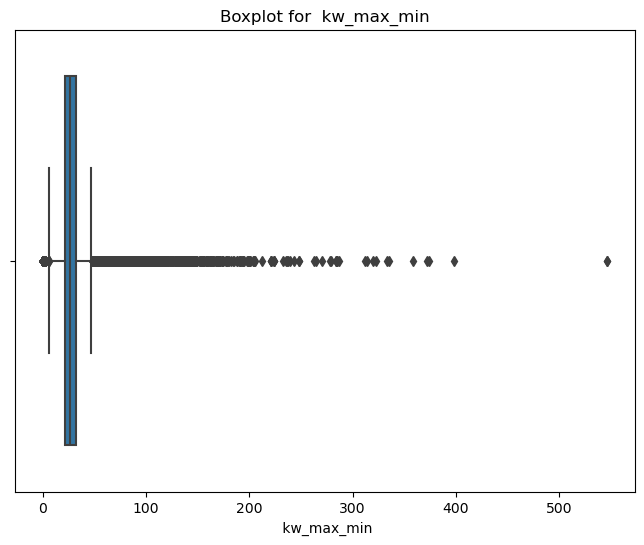

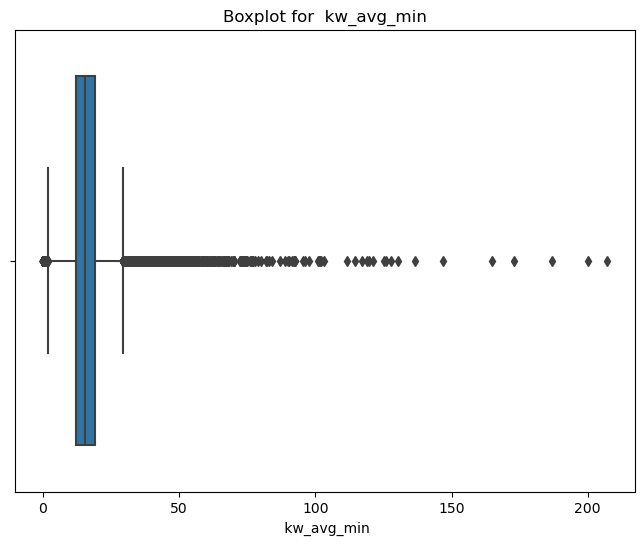

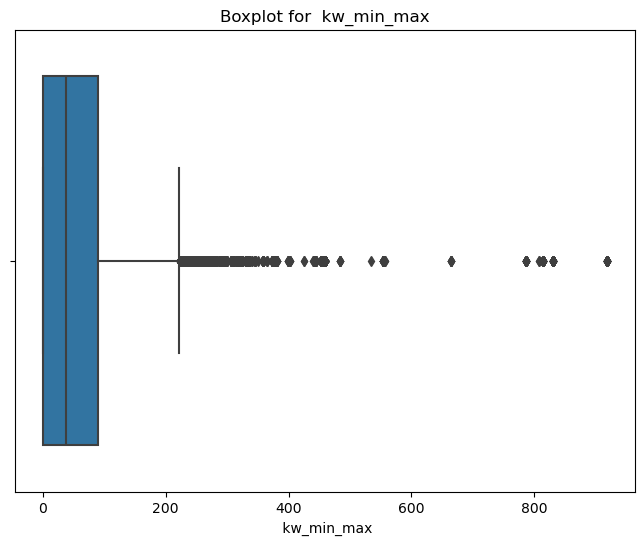

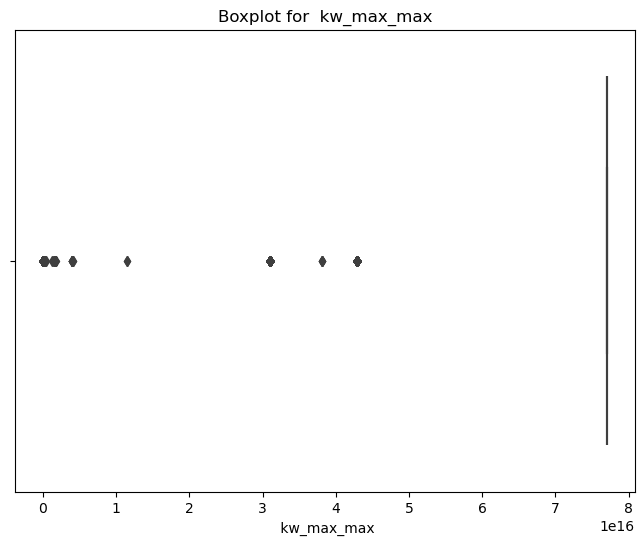

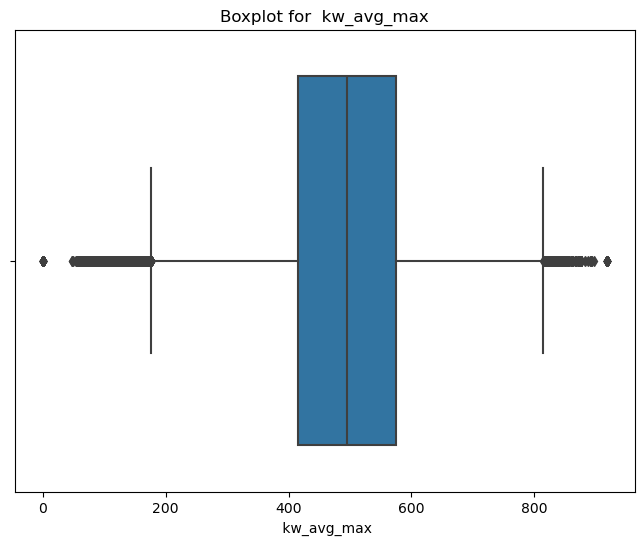

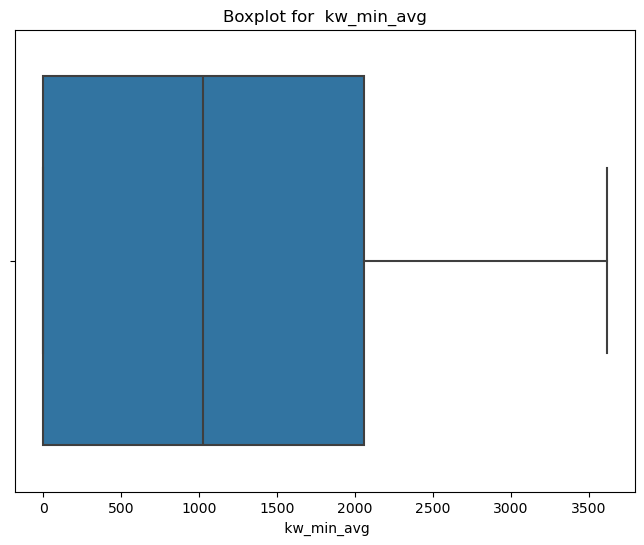

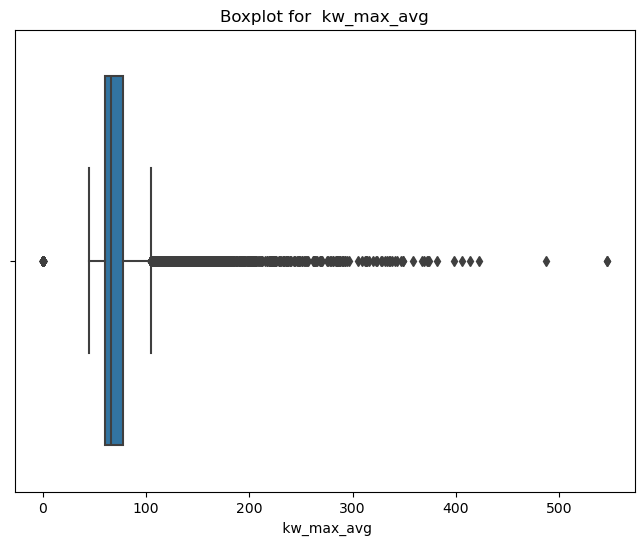

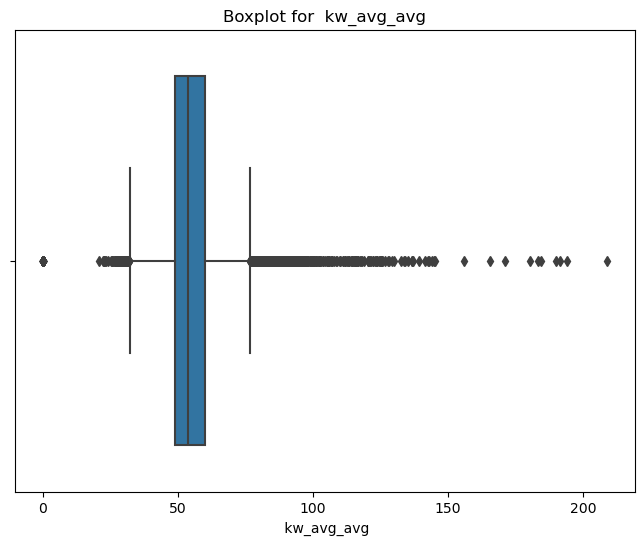

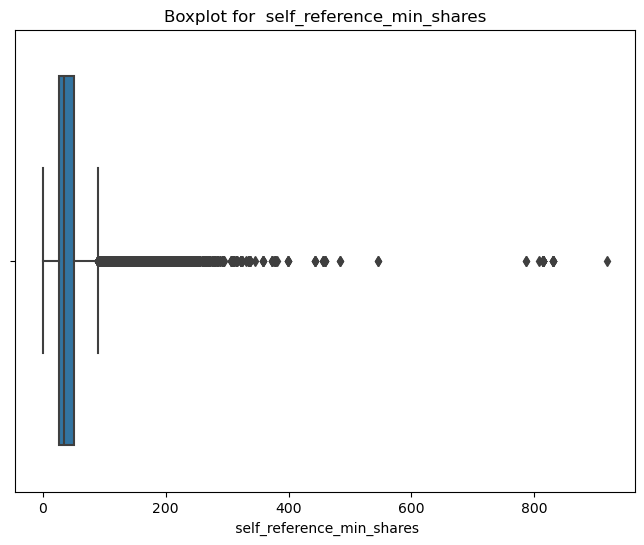

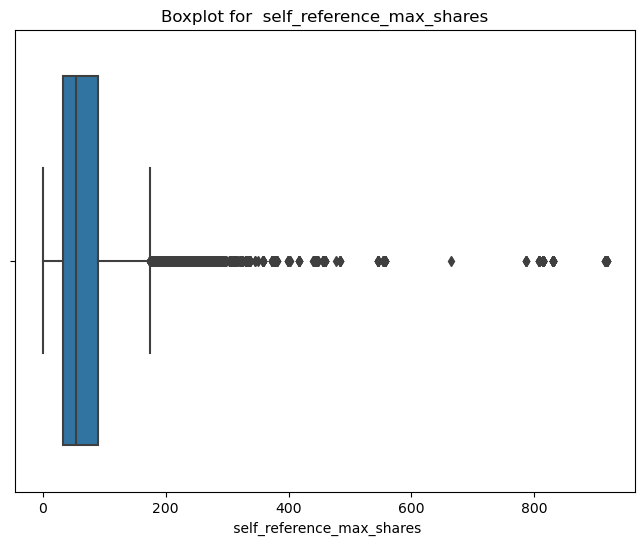

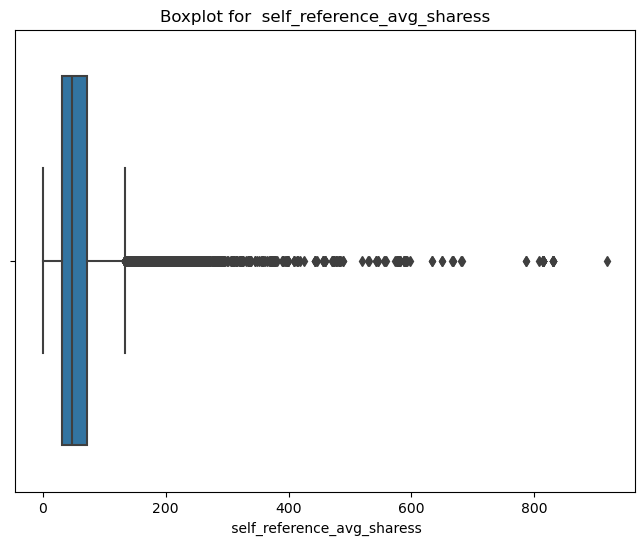

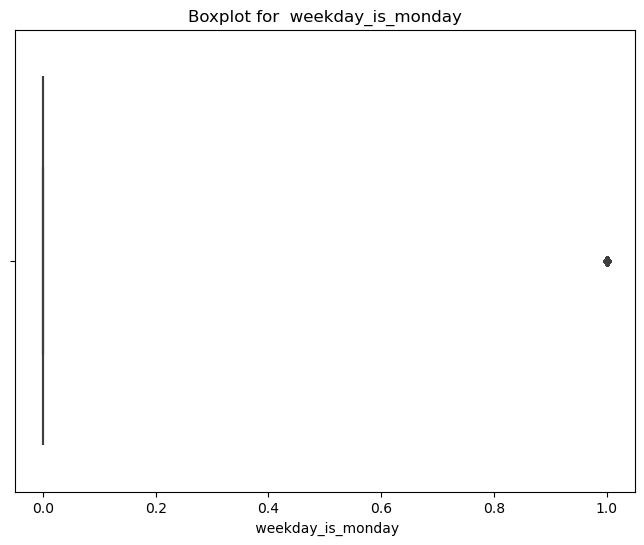

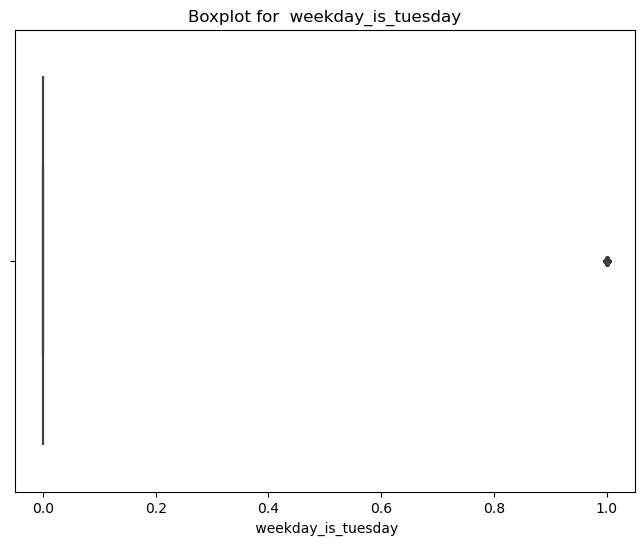

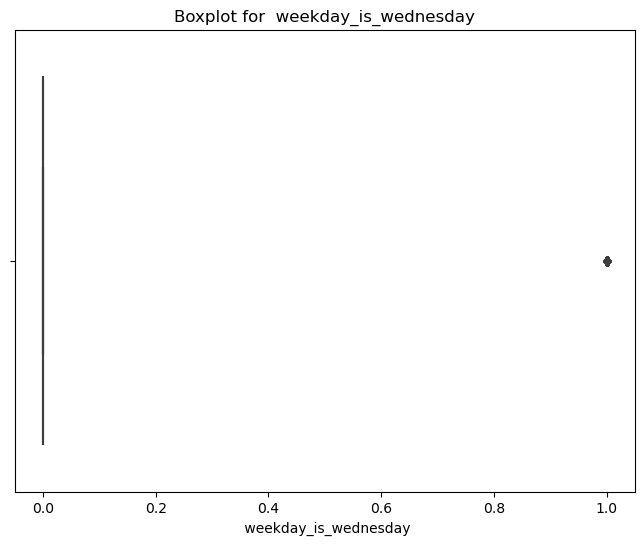

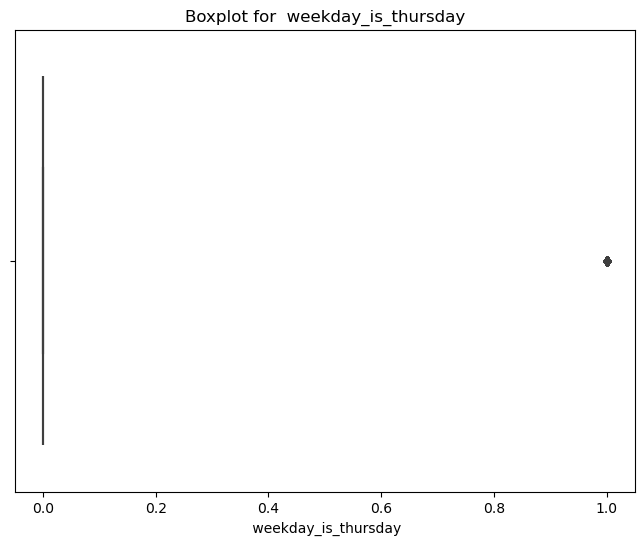

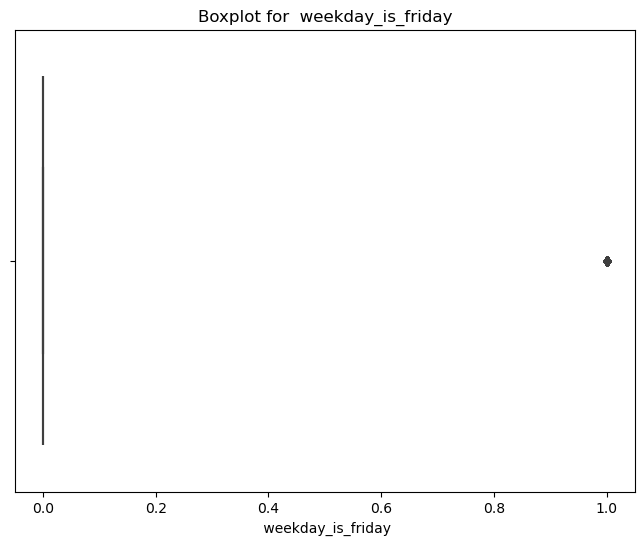

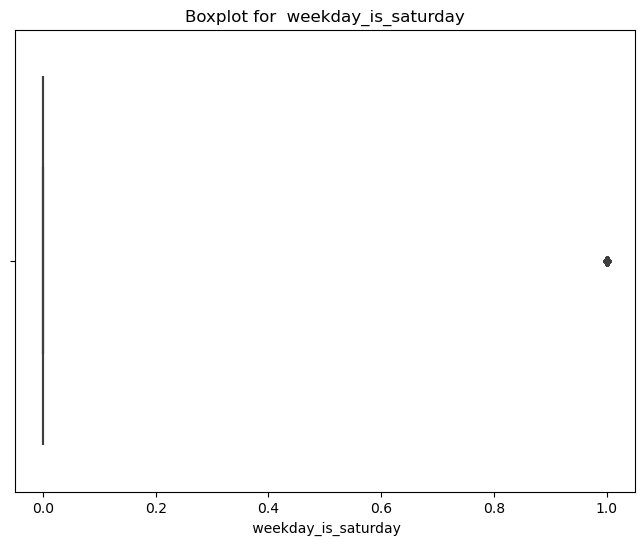

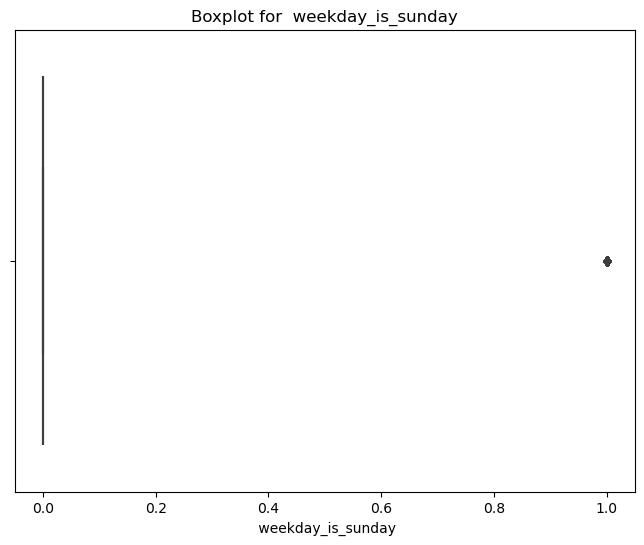

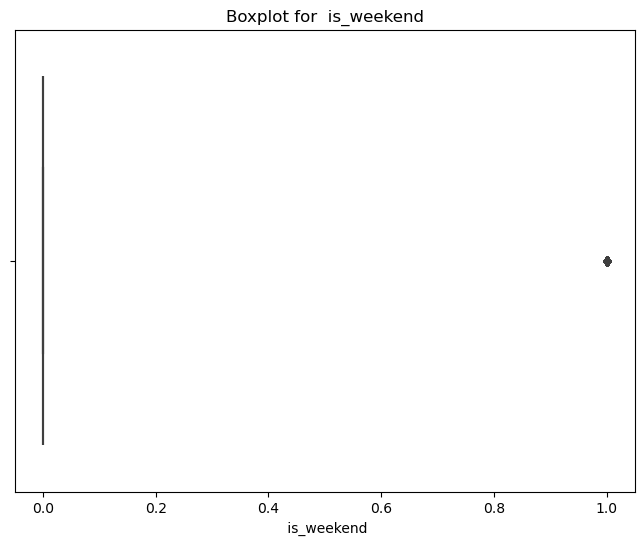

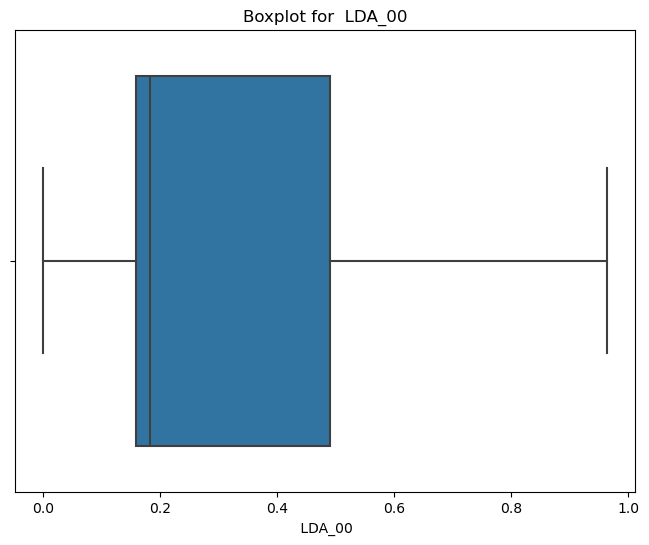

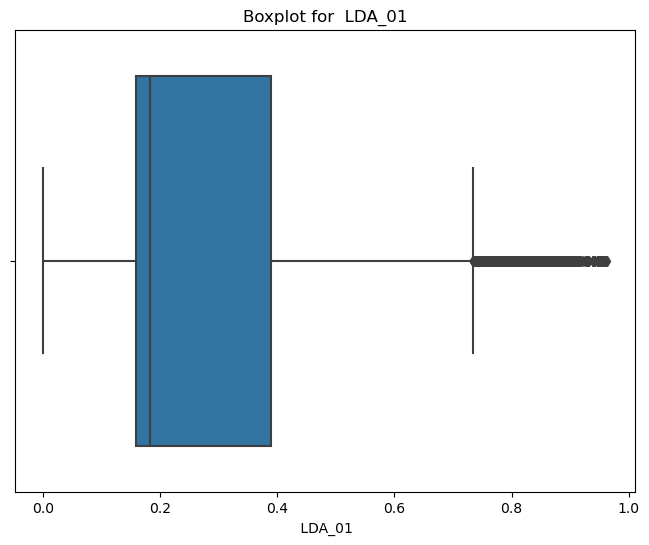

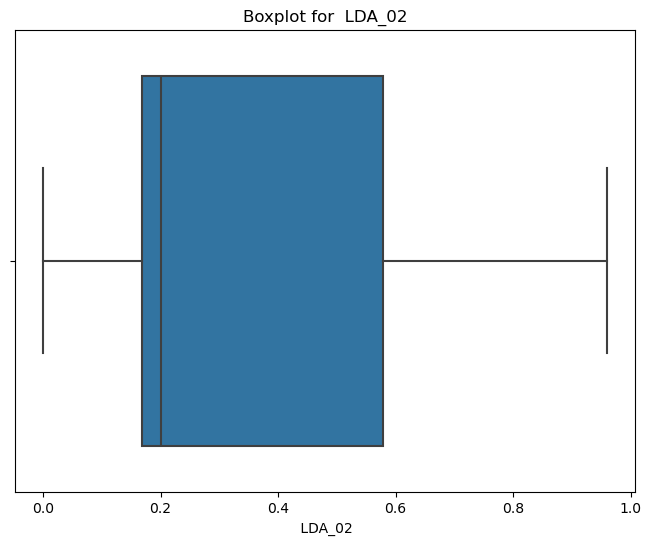

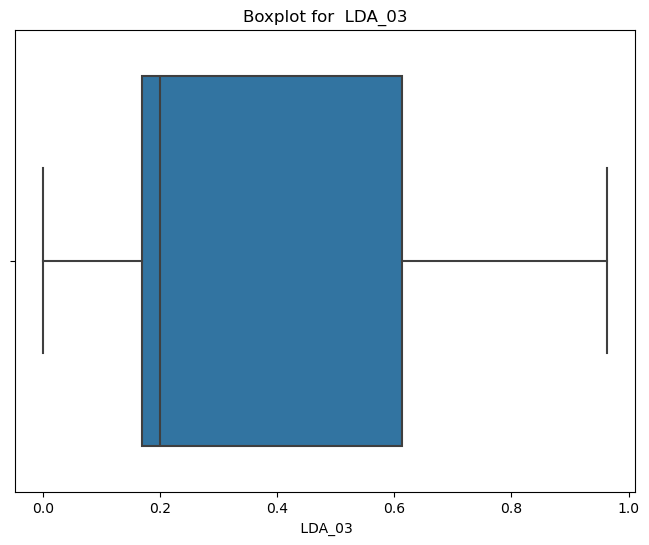

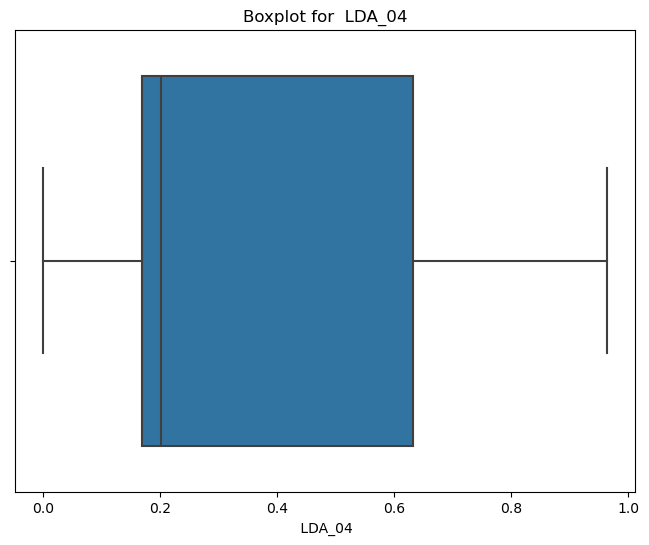

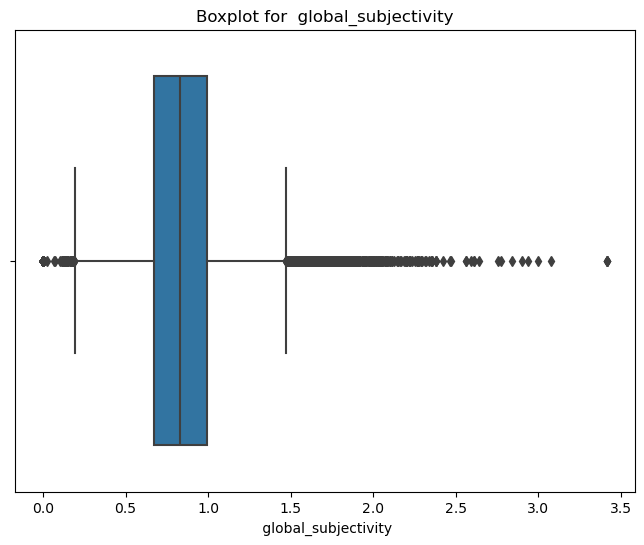

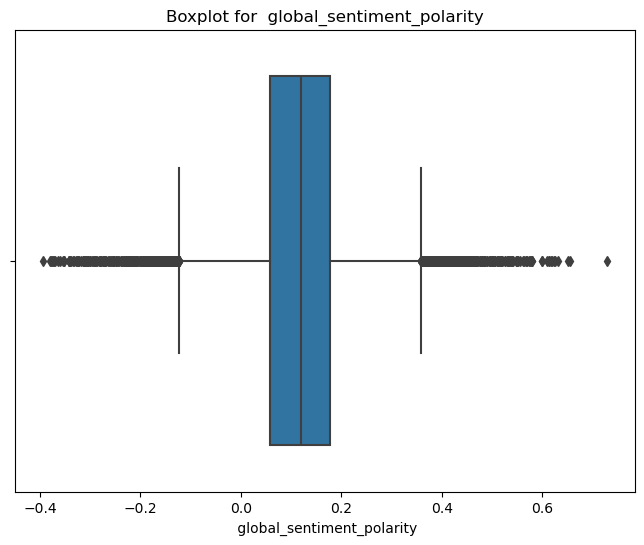

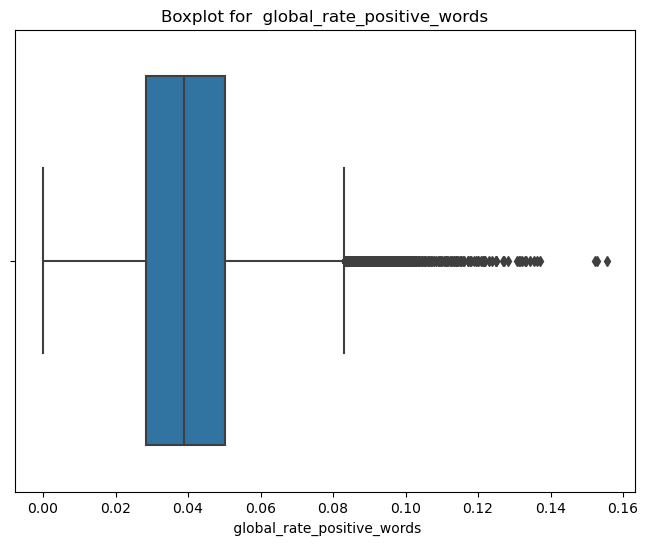

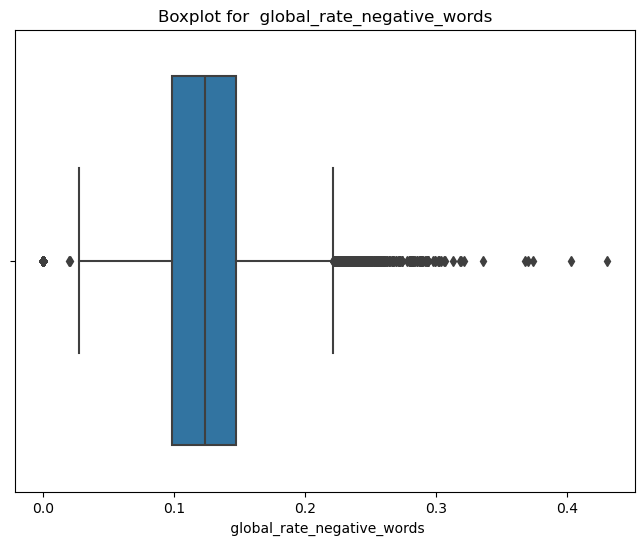

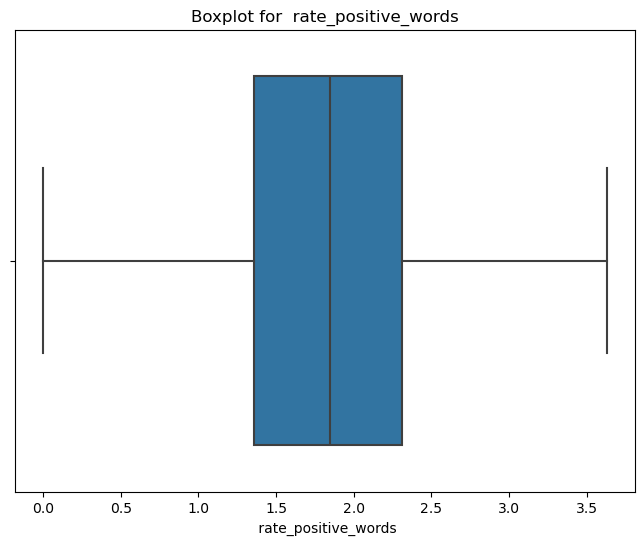

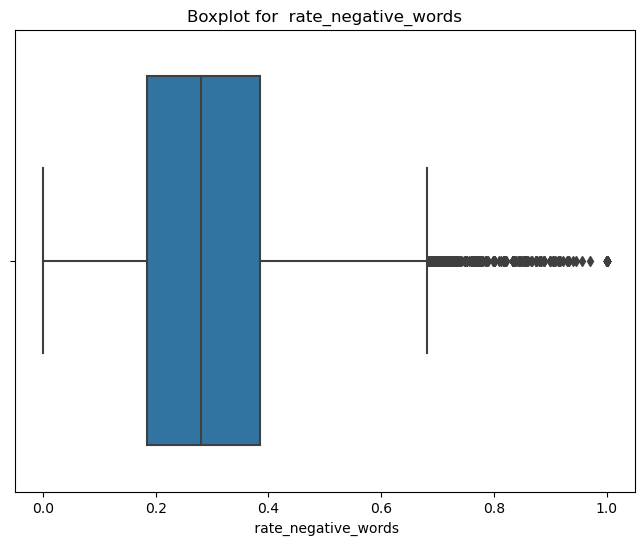

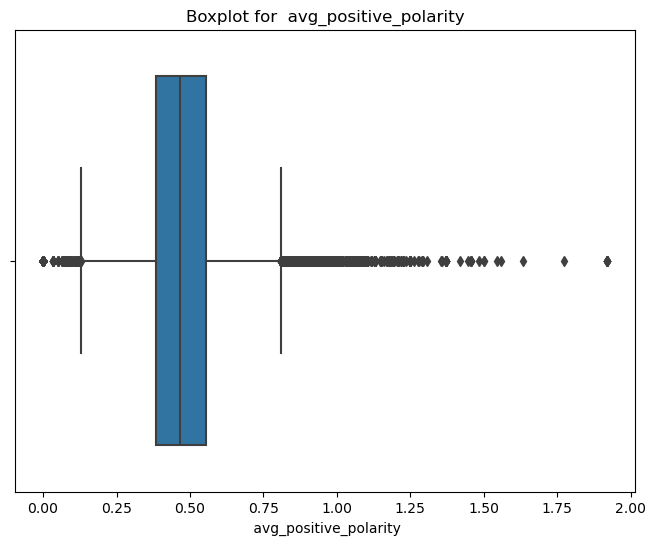

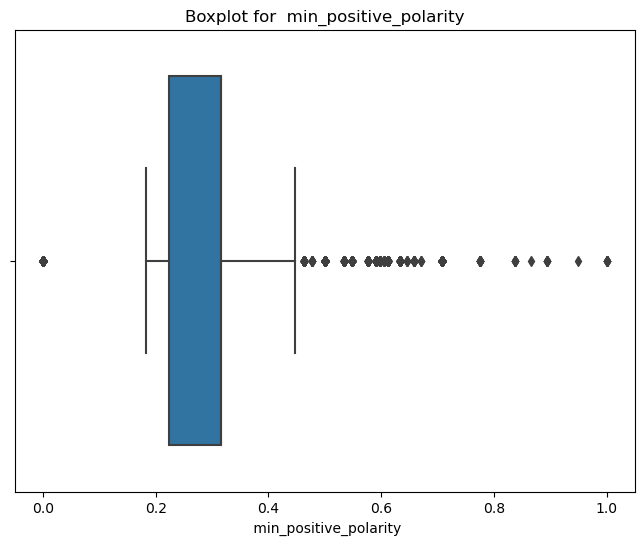

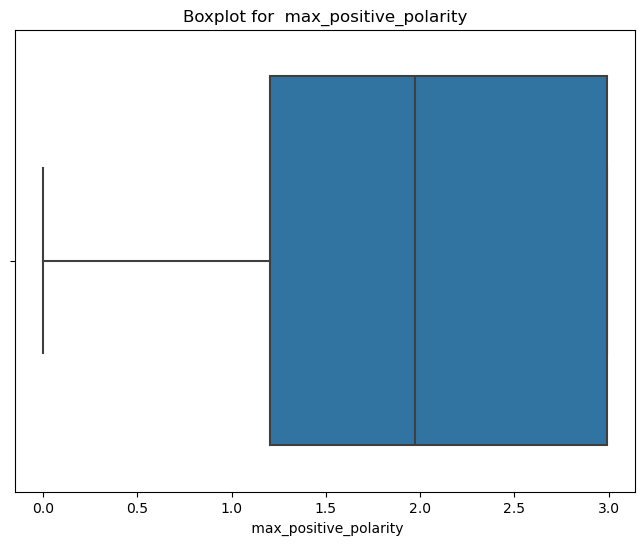

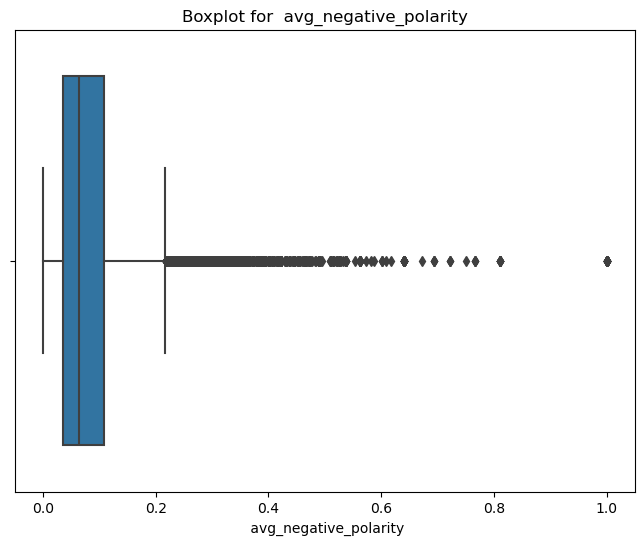

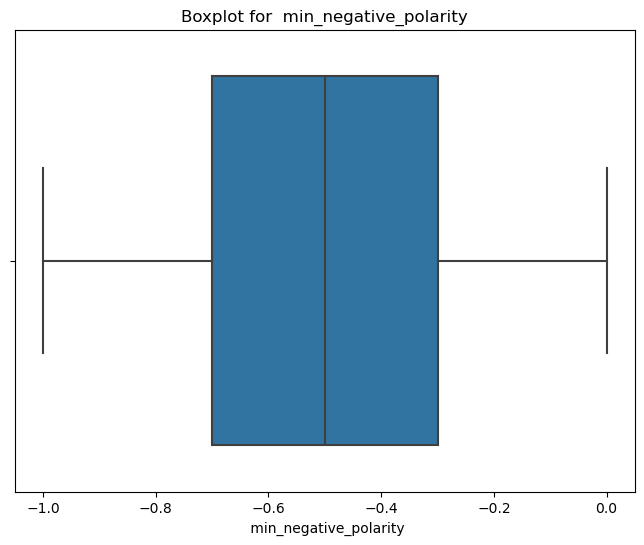

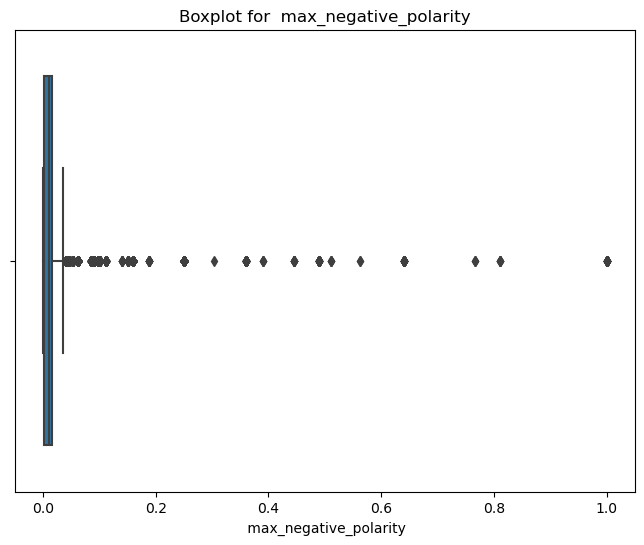

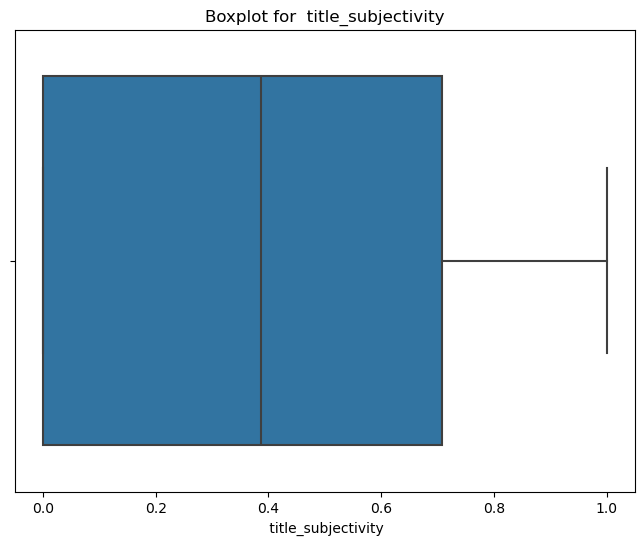

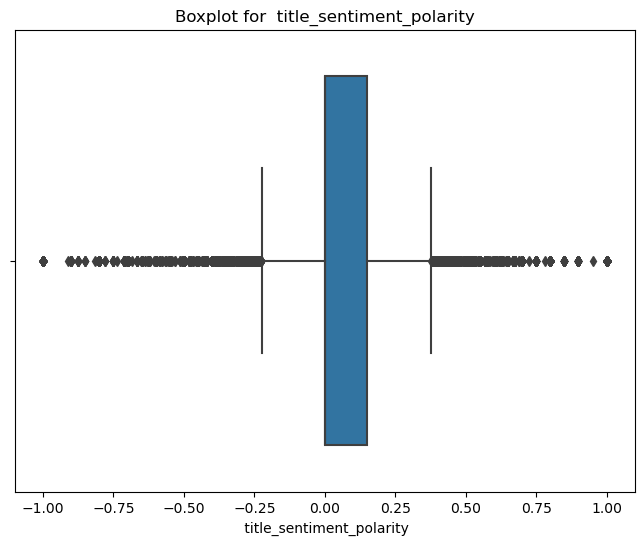

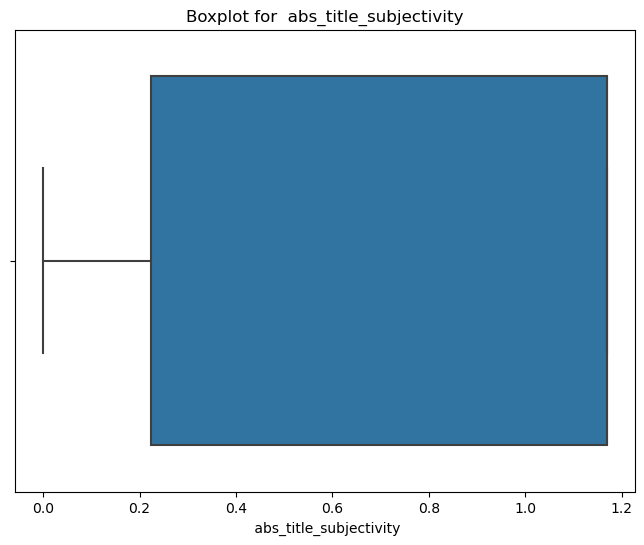

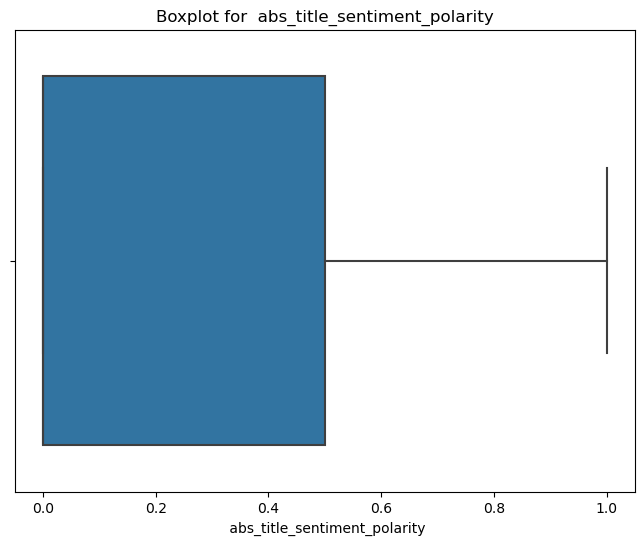

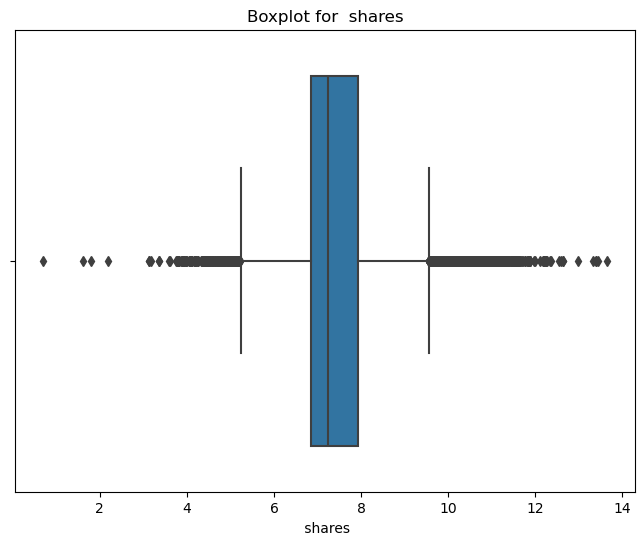

In [105]:
# Function to draw boxplots for all numerical columns in df_no_outliers
def draw_boxplots(df1):
    numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df1[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Example usage:
draw_boxplots(df1)

In [106]:
# Function to detect and impute outliers with median using the IQR method
def impute_outliers_with_median(df1, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the median of the column
        median_value = df1[col].median()
        df[col] = np.where((df1[col] < lower_bound) | (df1[col] > upper_bound), median_value, df1[col])

    return df1

# Example usage:

# Assuming df is your DataFrame and numerical_cols contains your numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Impute outliers with median
df1_imputed = impute_outliers_with_median(df1, numerical_columns)

# View the data after imputing
print("Data after imputing outliers with median:\n", df1_imputed.head())



print("Shape of dataset before imputing outliers:",df1.shape)
print("Shape of dataset after imputing outliers:",df1_imputed.shape)

Data after imputing outliers with median:
                                                  url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0          14.798649          0.814613                1.0   
1              9.0          15.968719          0.777652                1.0   
2              9.0          14.525839          0.758373                1.0   
3              9.0          23.043437          0.709780                1.0   
4             13.0          32.741411          0.644706                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0 

In [107]:
df2 = df1_imputed

In [108]:
# Function to detect and cap outliers using the IQR method
def cap_outliers_iqr(df1, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df2[col] = np.where(df2[col] < lower_bound, lower_bound, df2[col])
        df2[col] = np.where(df2[col] > upper_bound, upper_bound, df2[col])

    return df2

# Example usage
# Assuming df1 is your DataFrame and numerical_columns contains your numerical columns
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns

# Apply capping to outliers after imputing them with the median
df2_capped = cap_outliers_iqr(df2, numerical_columns)

# View the data after capping outliers
print("Data after capping outliers:\n", df2_capped.head())

Data after capping outliers:
                                                  url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0          14.798649          0.814613                1.0   
1              9.0          15.968719          0.777652                1.0   
2              9.0          14.525839          0.758373                1.0   
3              9.0          23.043437          0.709780                1.0   
4             13.0          32.741411          0.644706                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0              

In [109]:
df3 = df2_capped
df3.shape

(39644, 61)

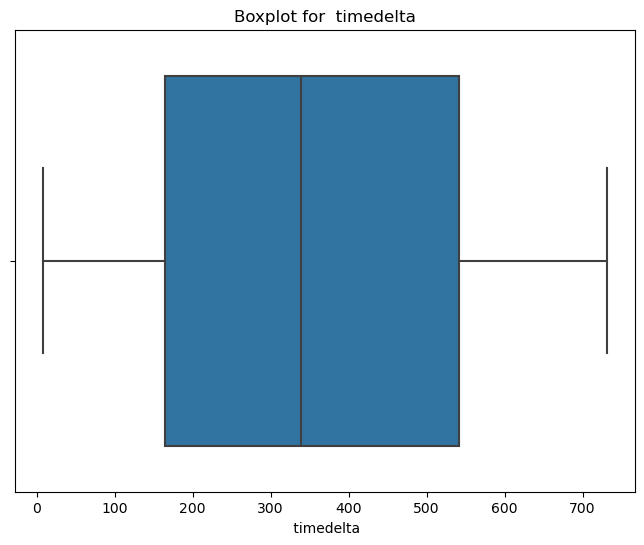

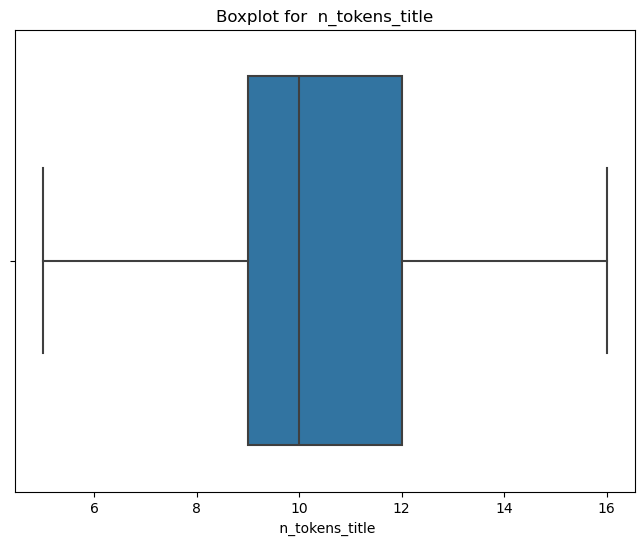

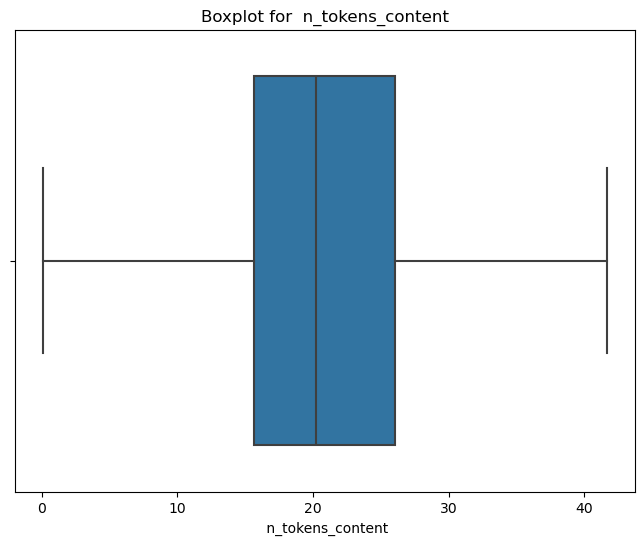

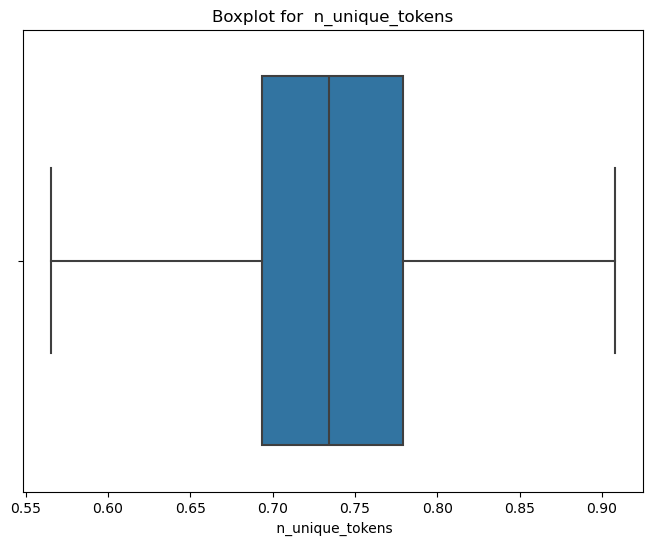

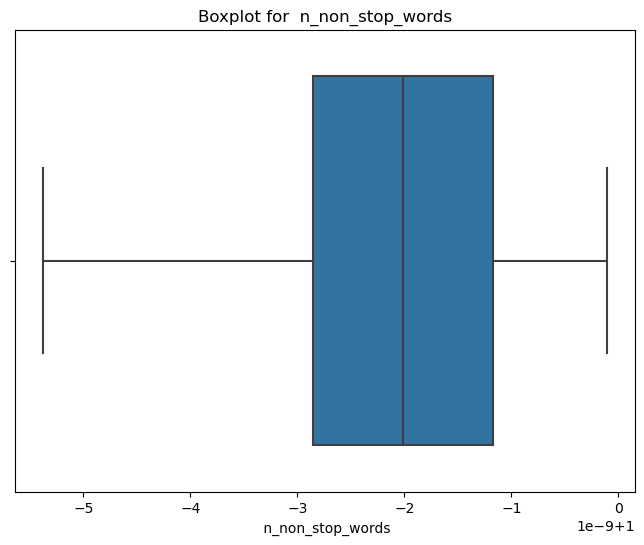

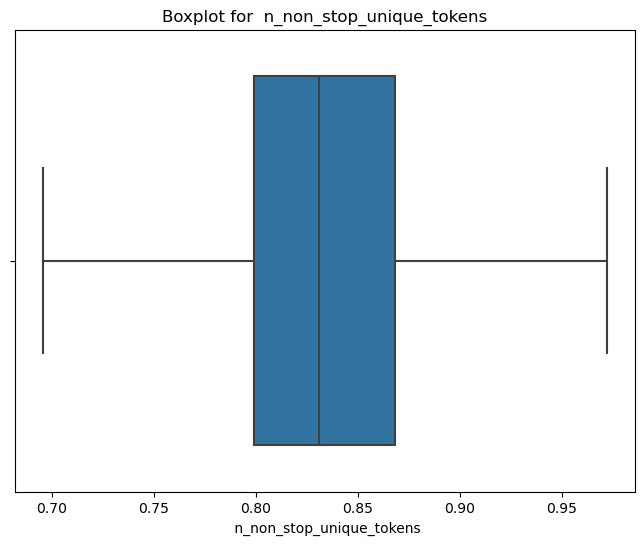

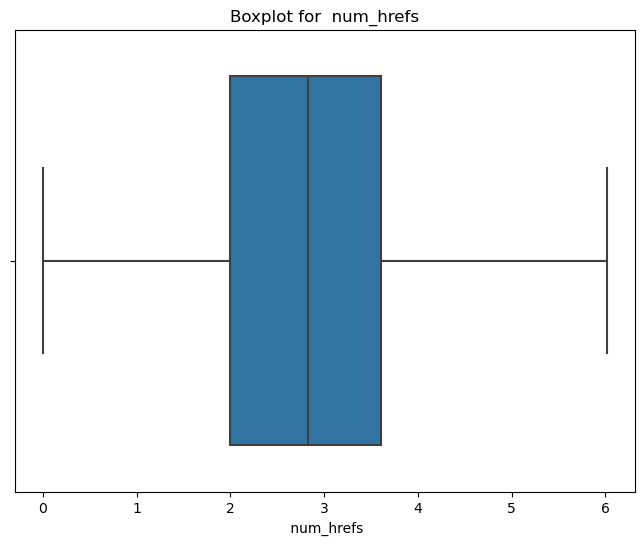

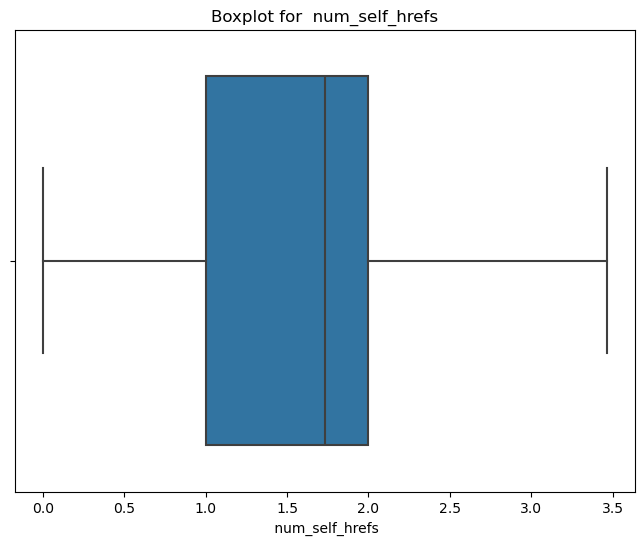

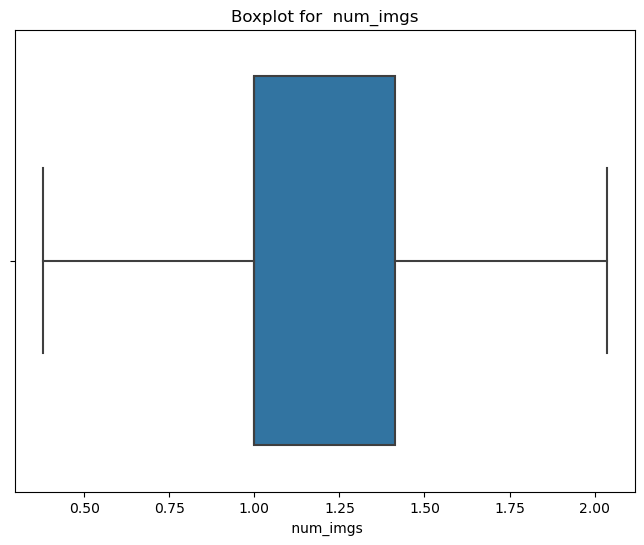

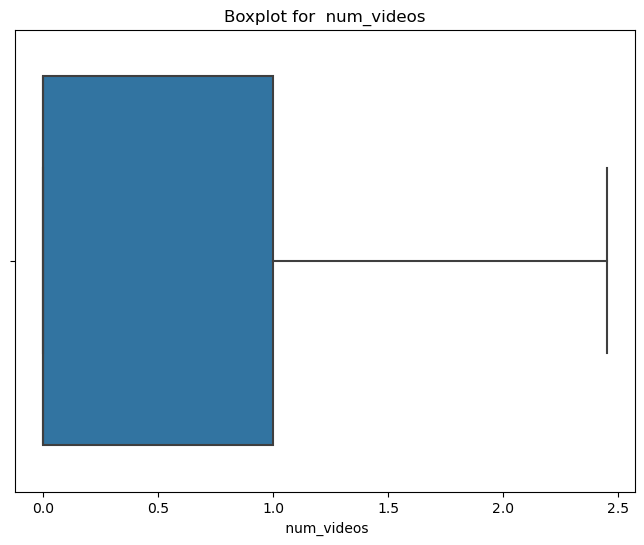

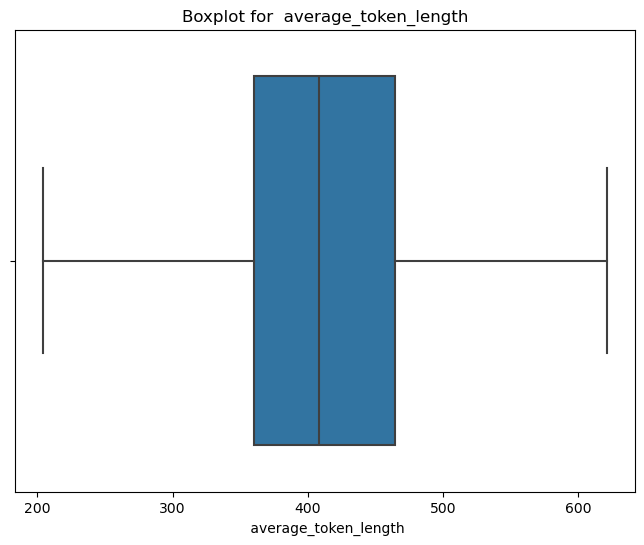

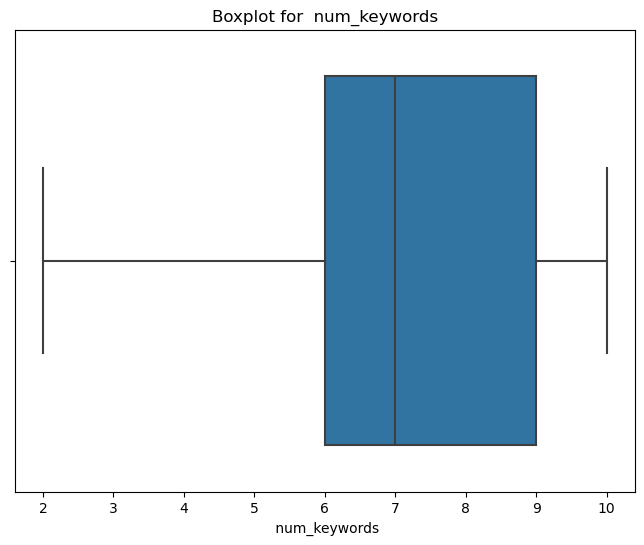

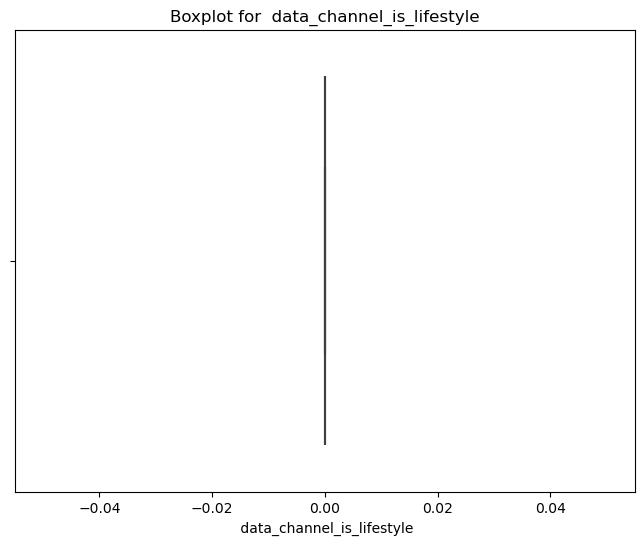

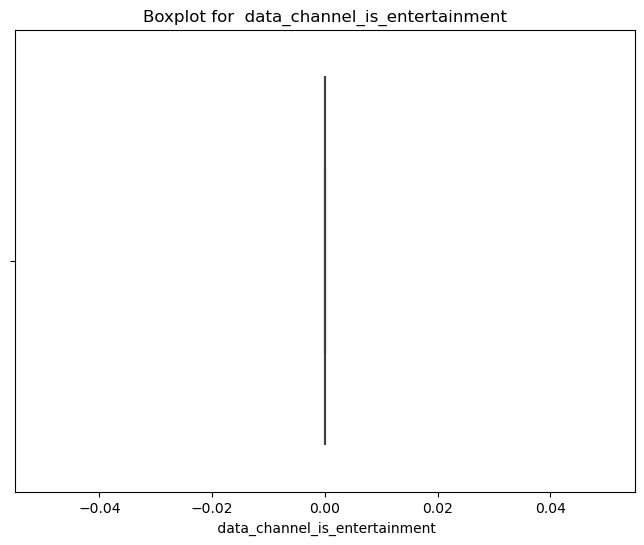

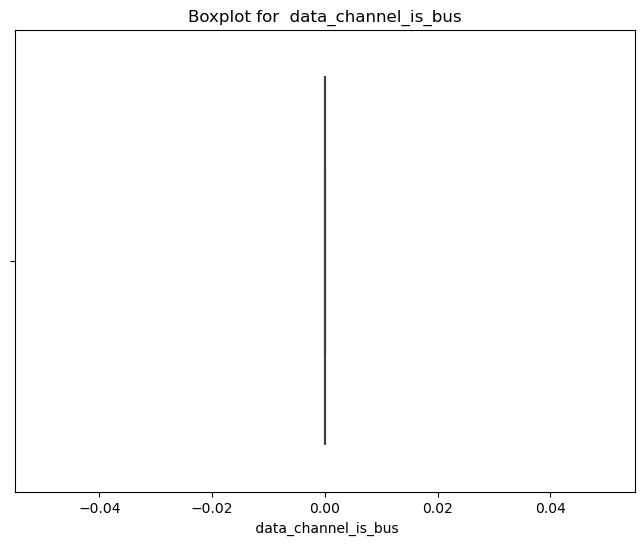

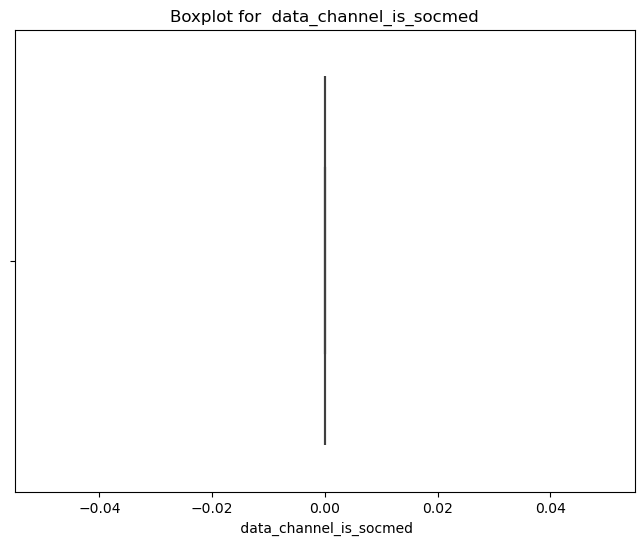

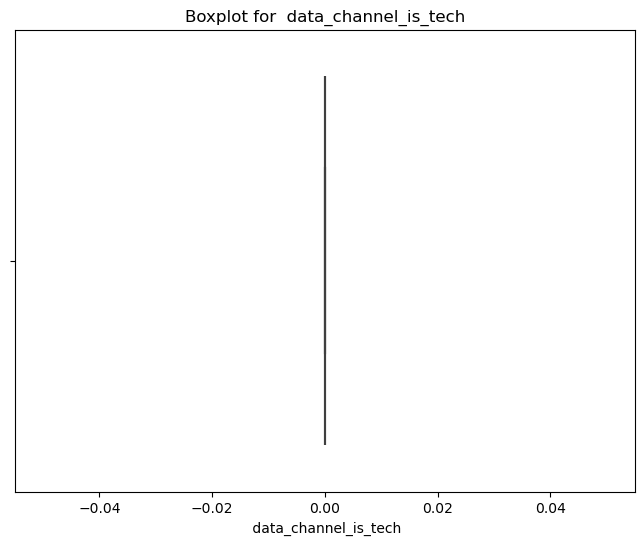

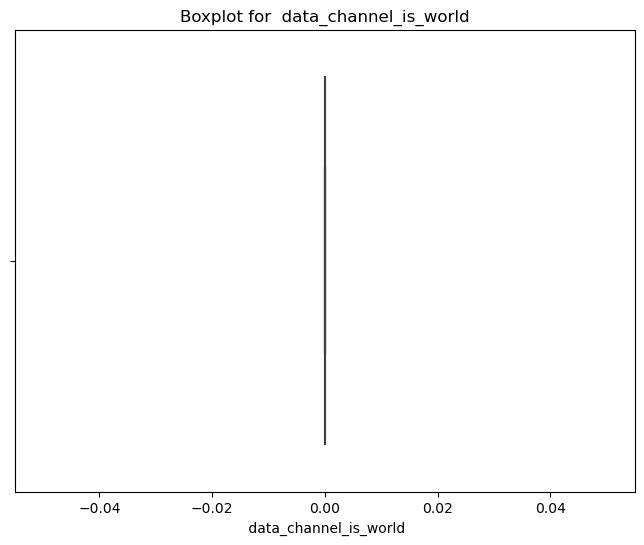

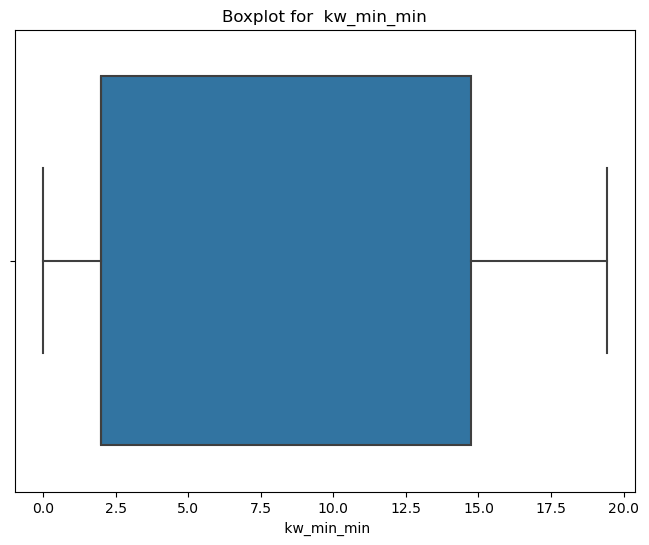

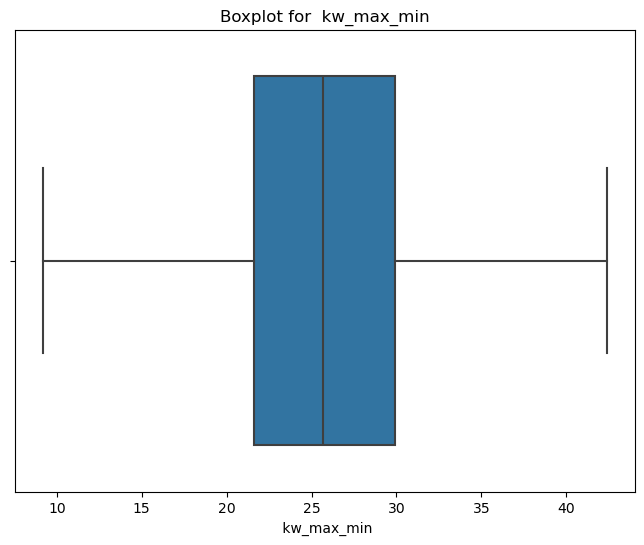

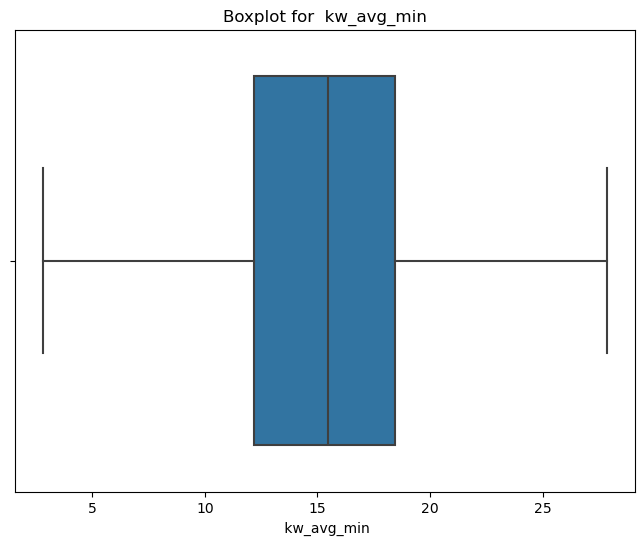

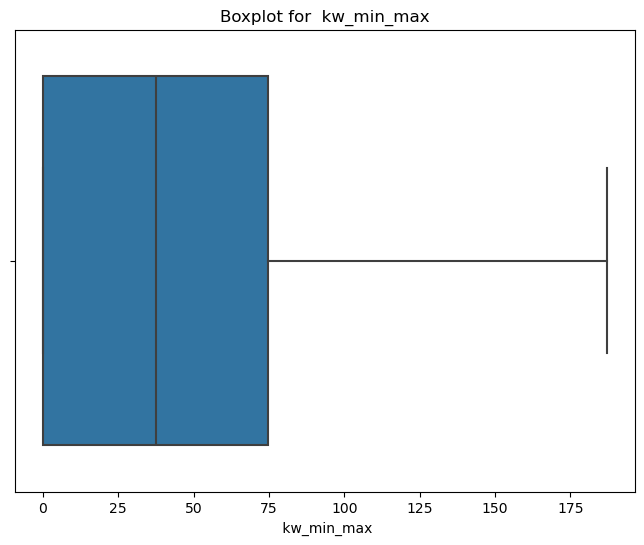

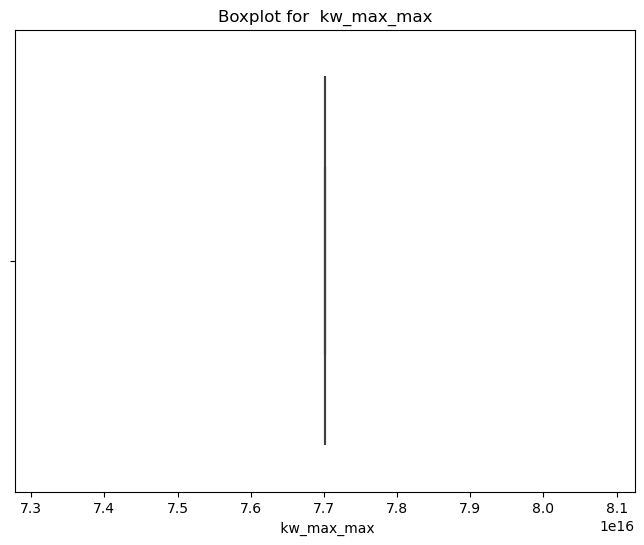

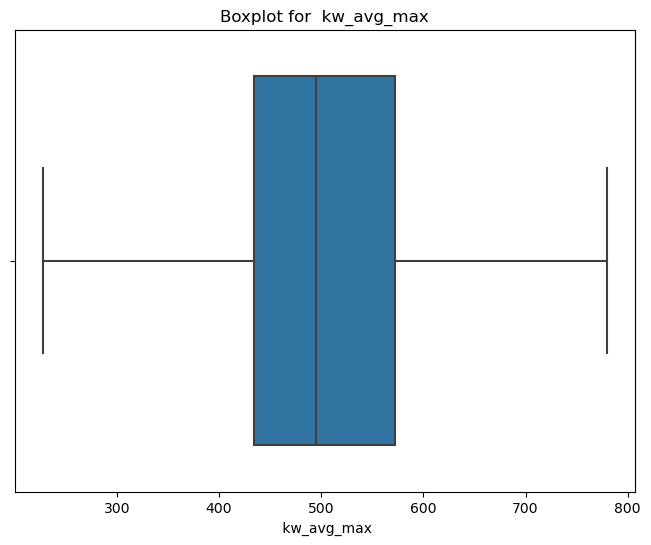

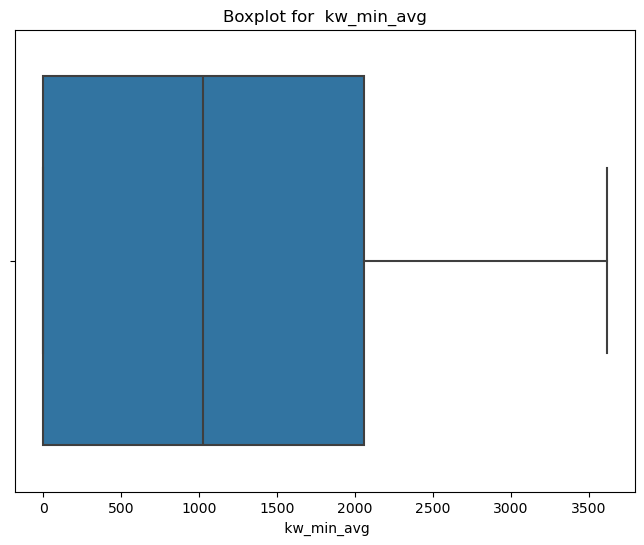

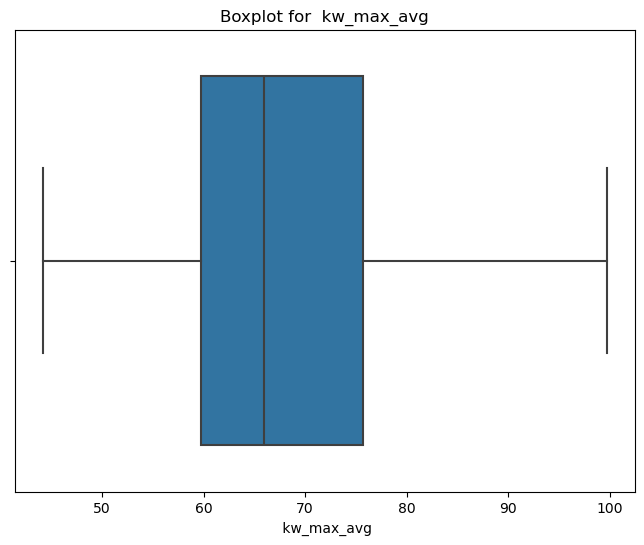

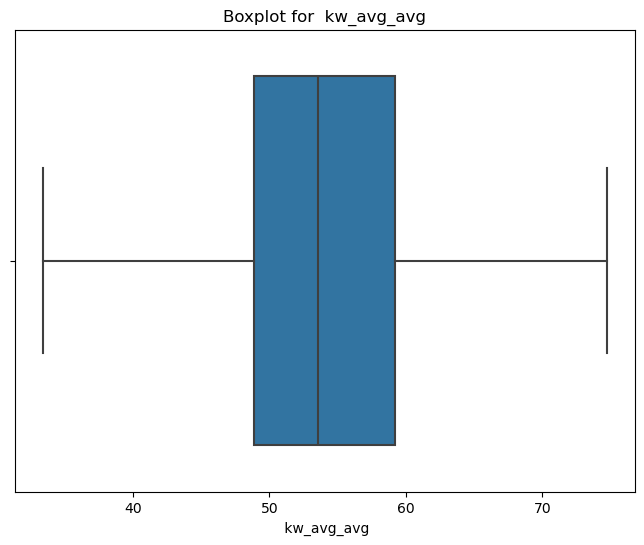

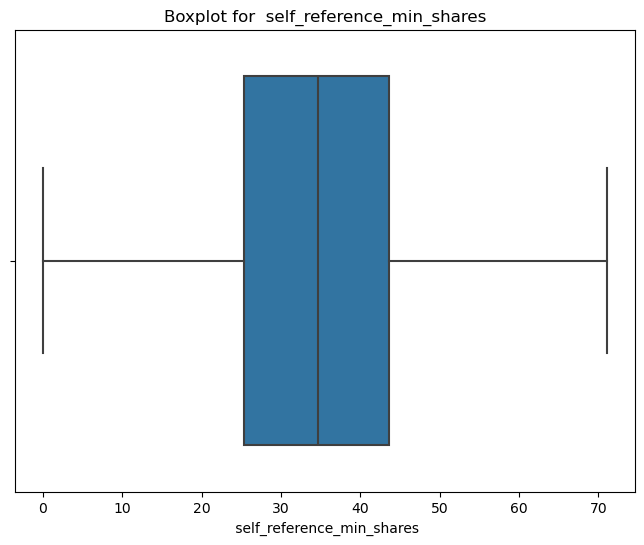

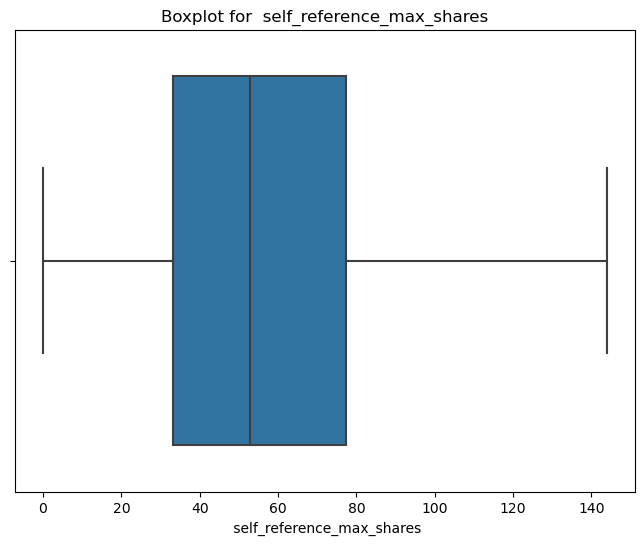

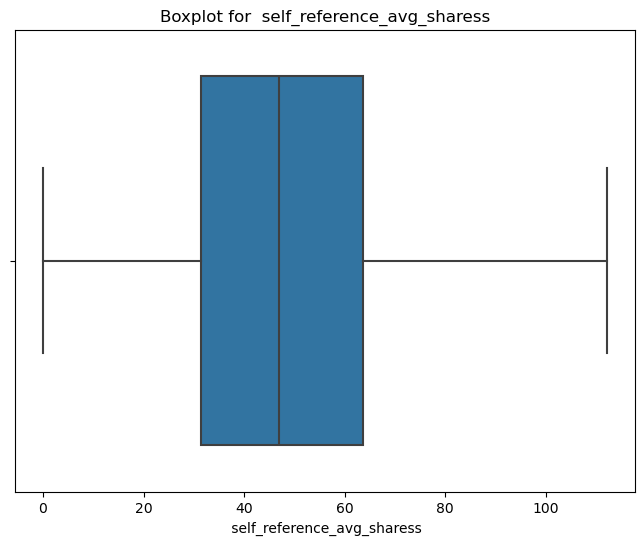

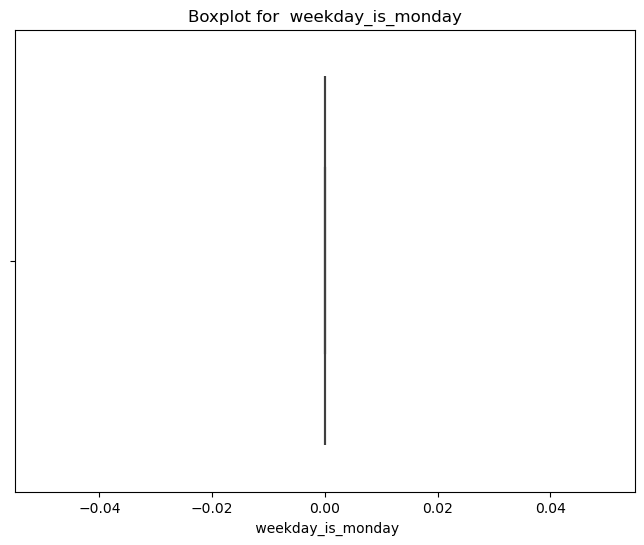

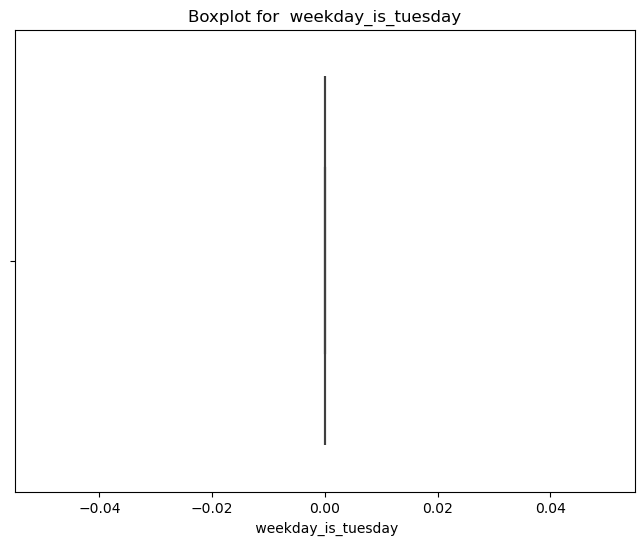

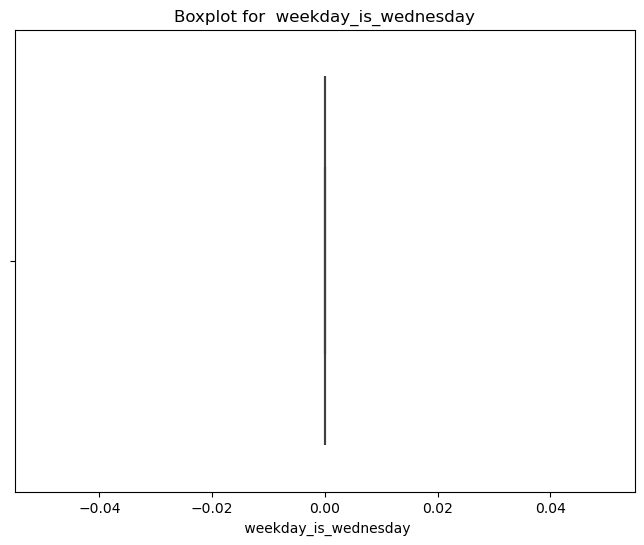

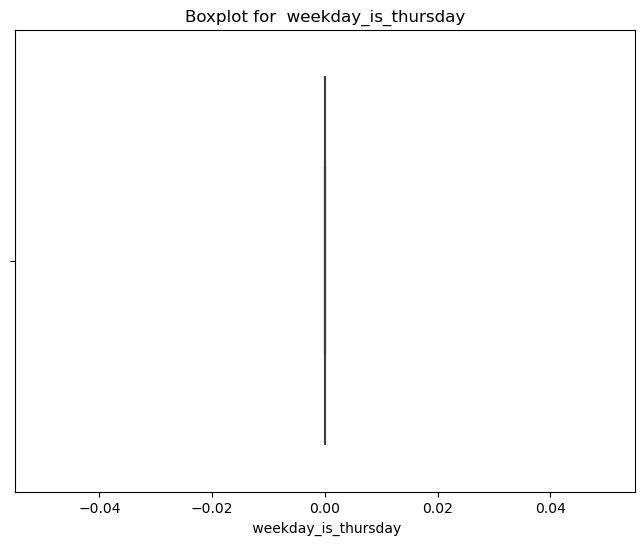

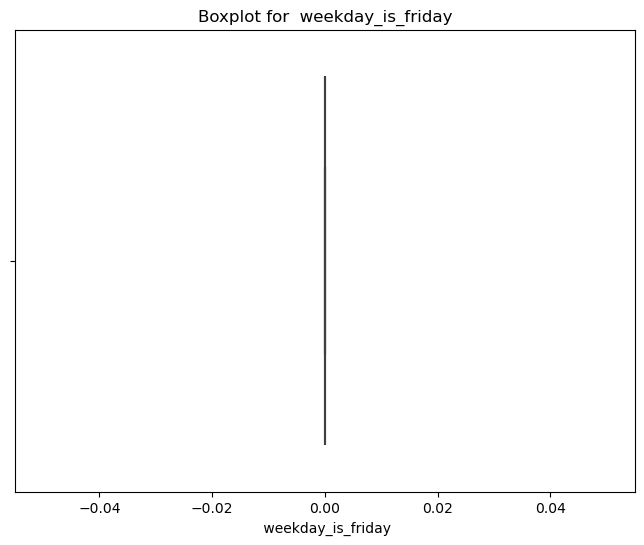

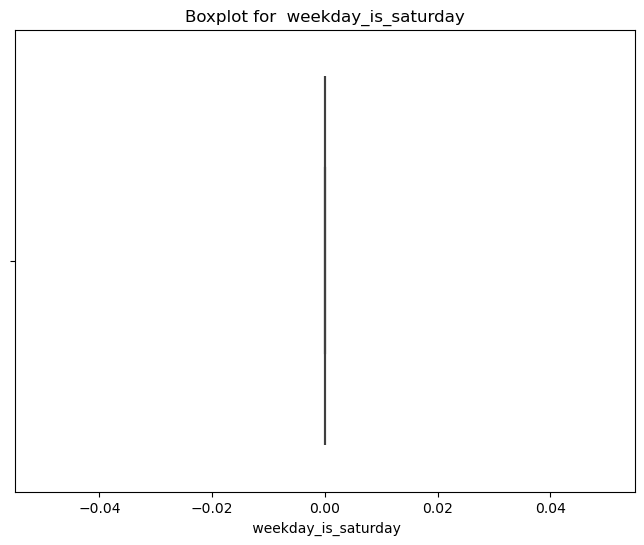

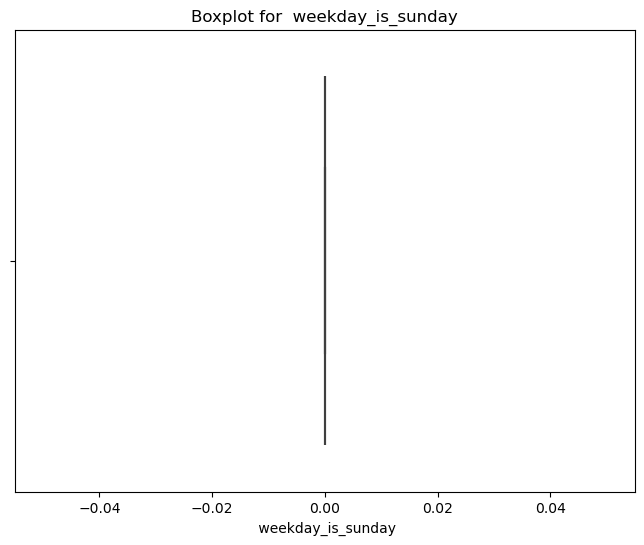

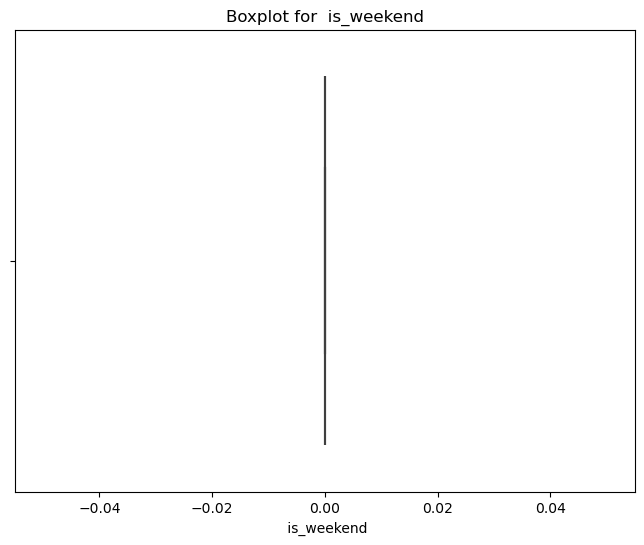

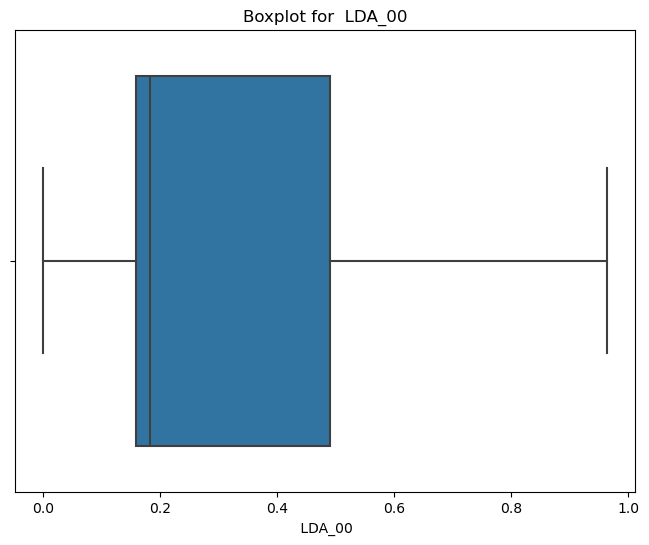

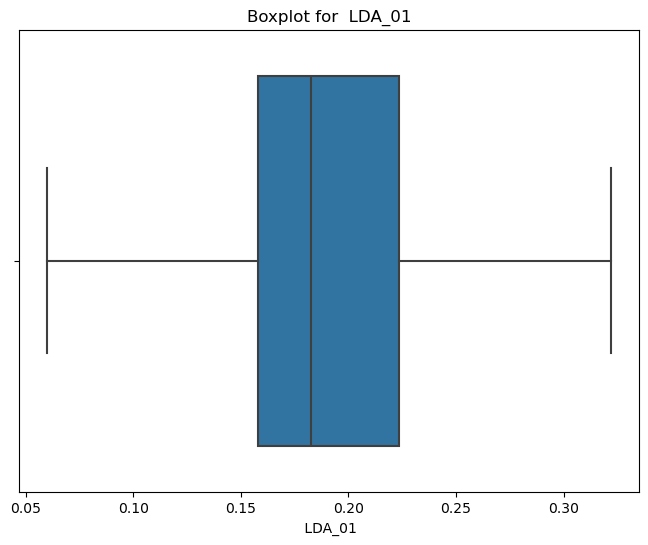

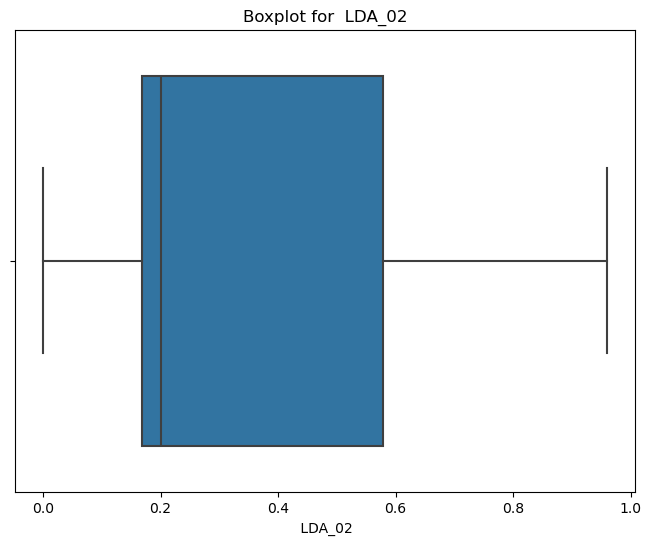

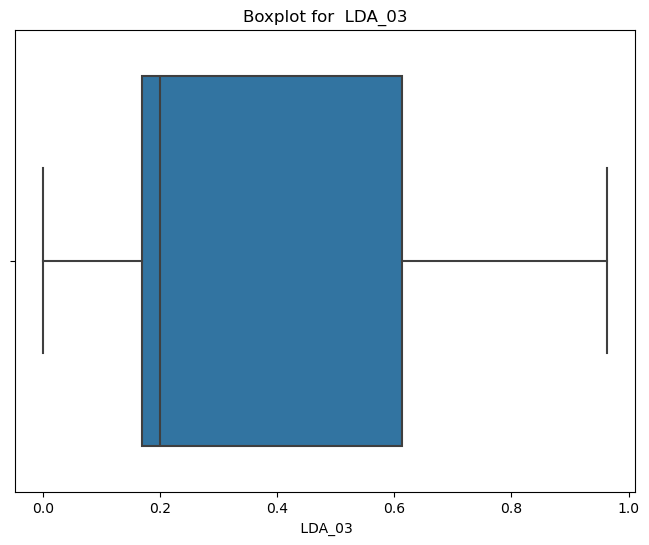

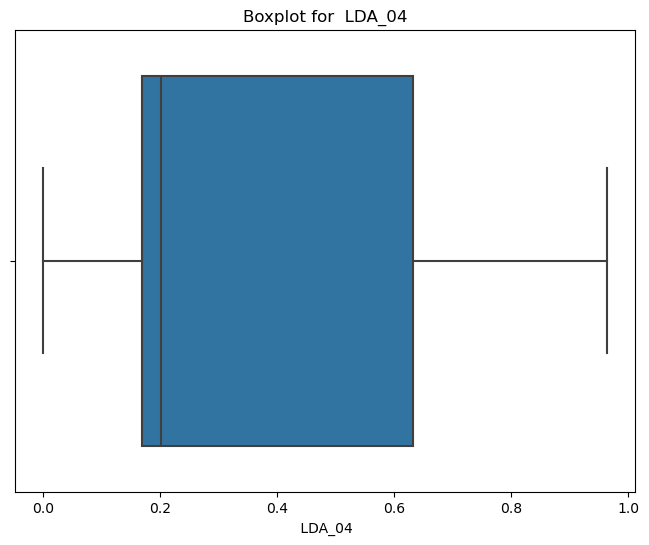

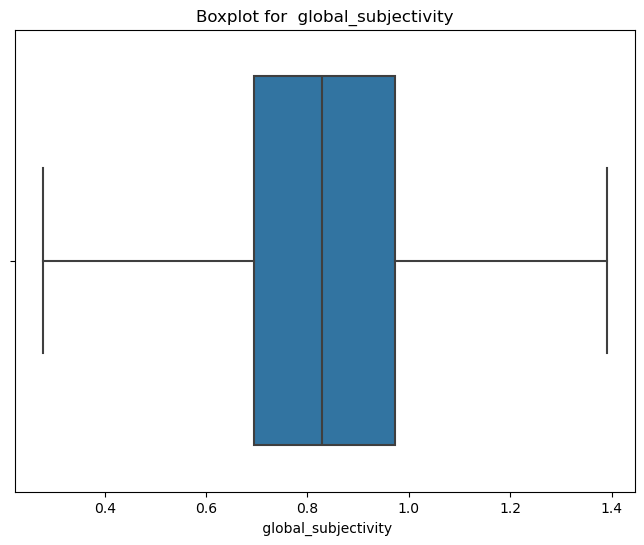

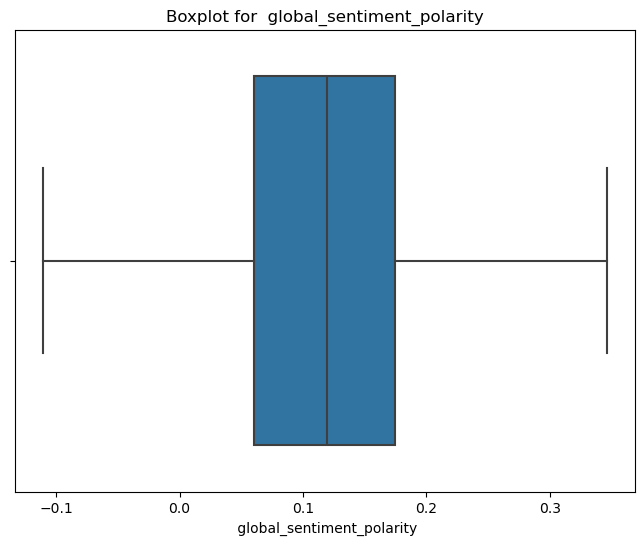

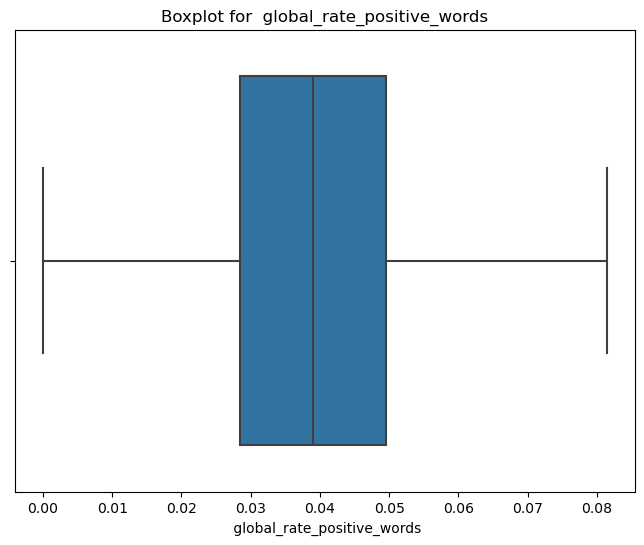

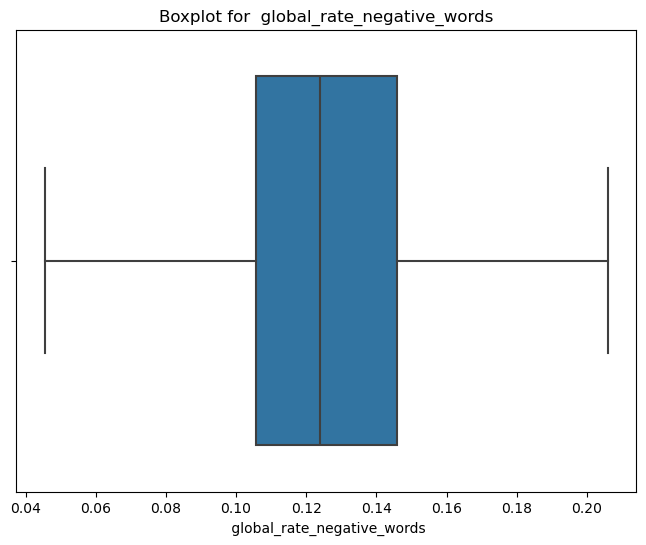

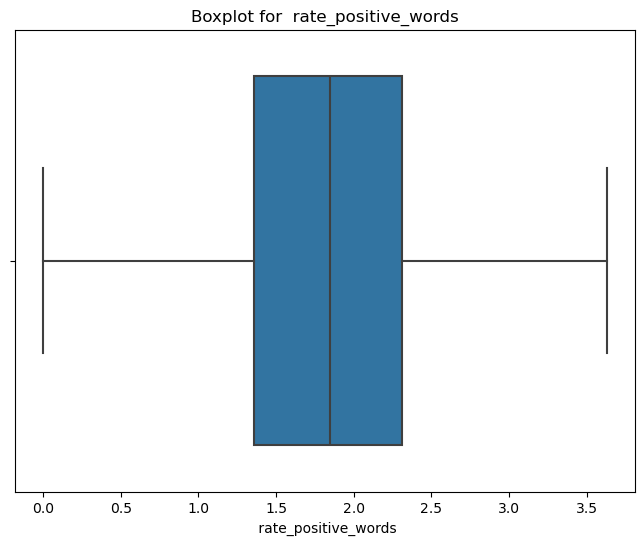

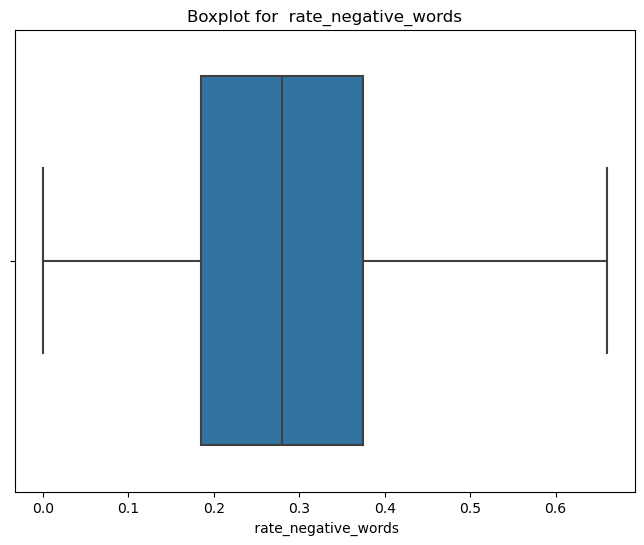

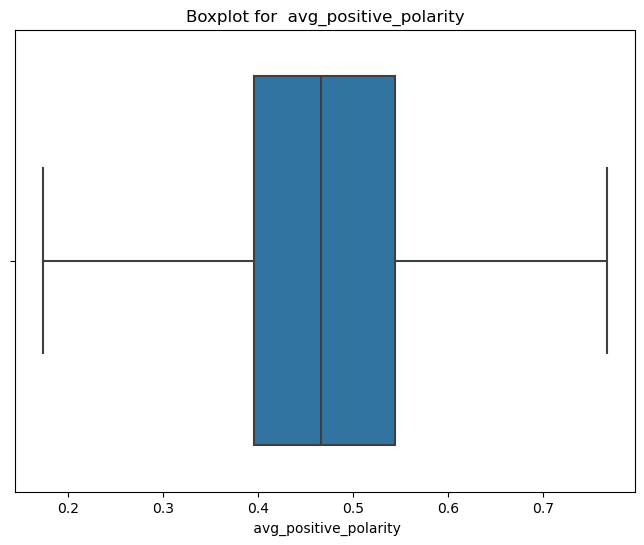

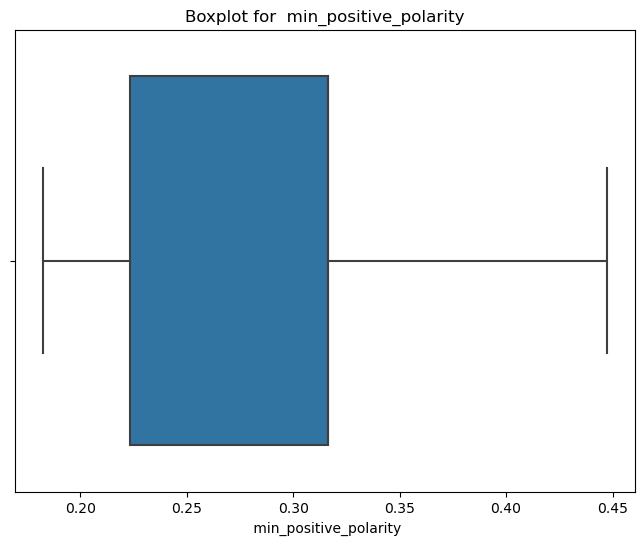

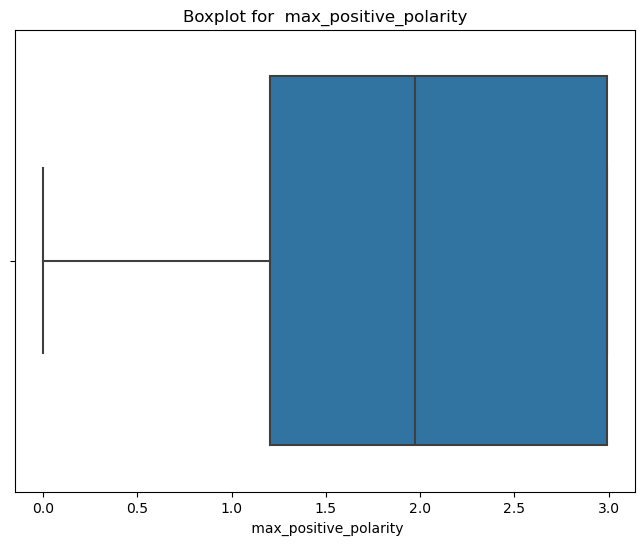

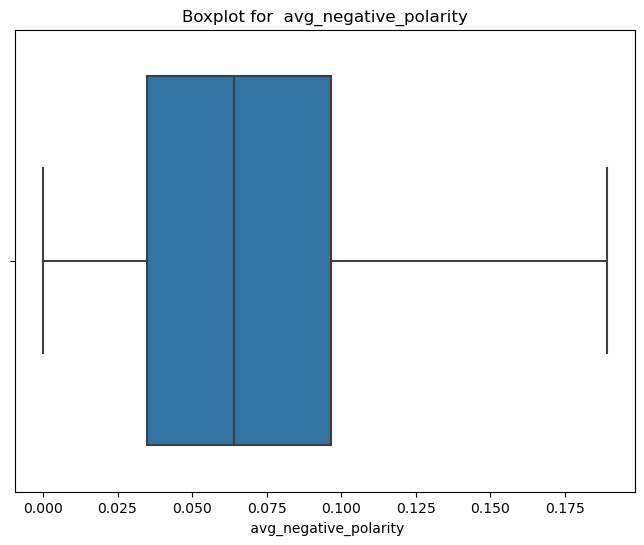

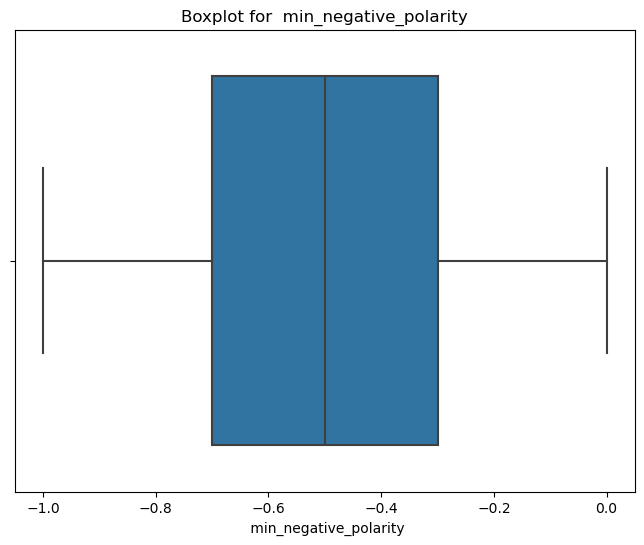

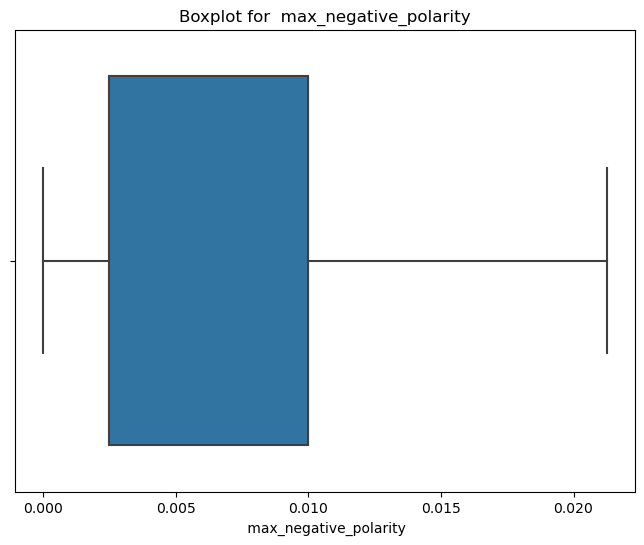

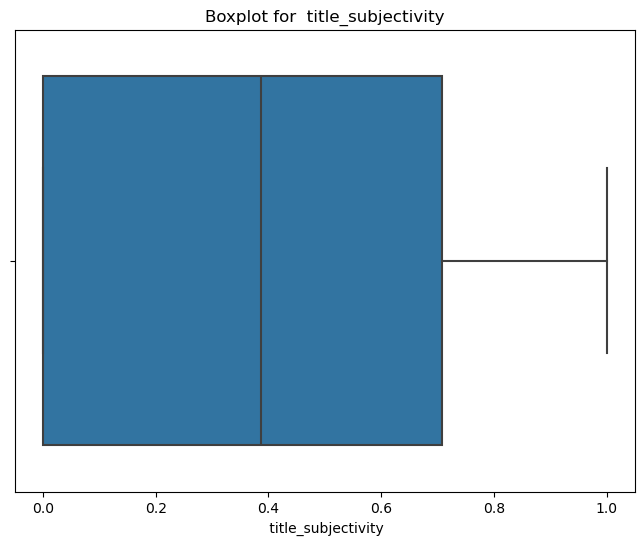

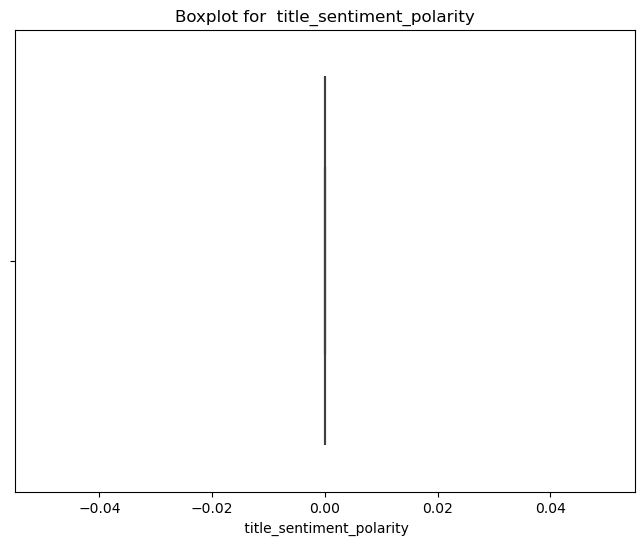

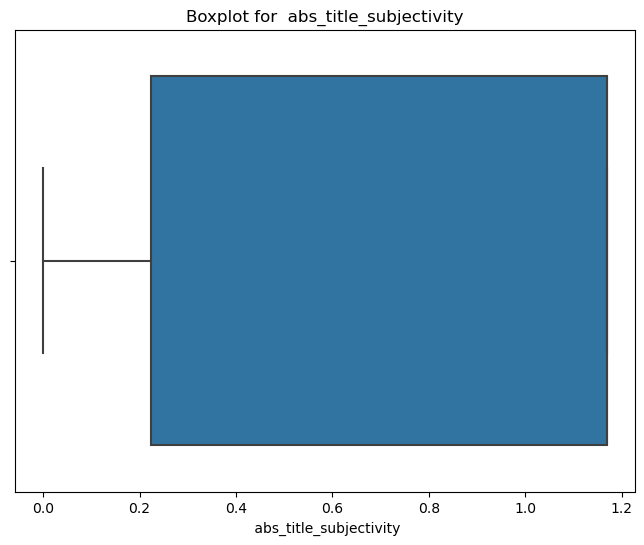

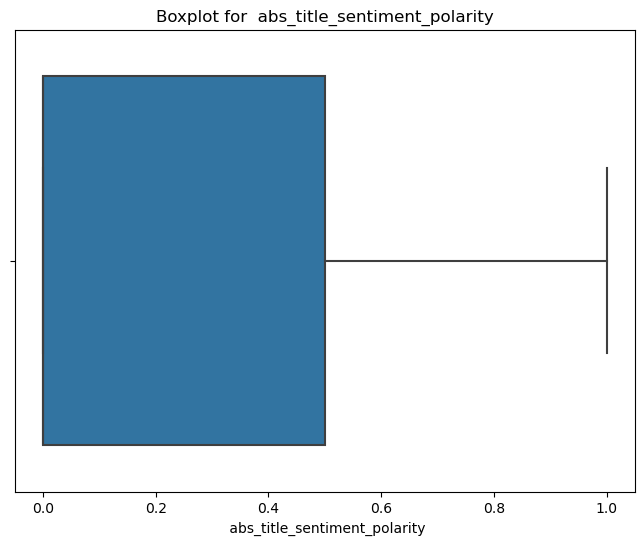

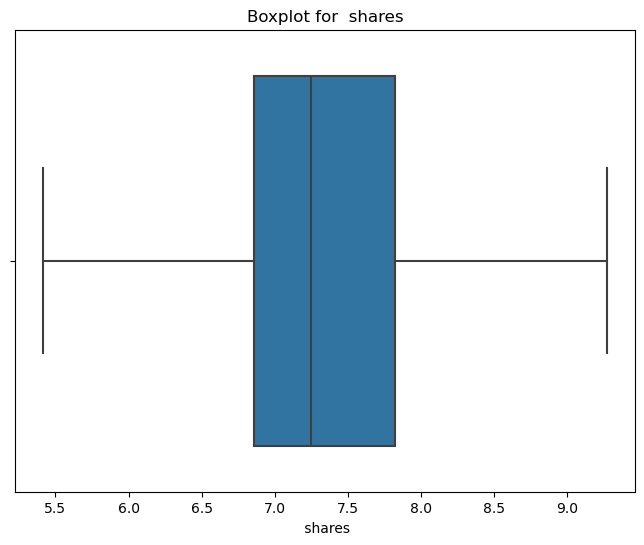

In [110]:
# Function to draw boxplots for all numerical columns in df_no_outliers
def draw_boxplots(df3):
    numerical_cols = df3.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df3[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Example usage:
draw_boxplots(df3)

## 6.Exploratory Data Analysis
Exploratory Data Analysis (EDA) is a crucial initial step in data science projects. It involves analyzing and visualizing data to understand its key characteristics, uncover patterns, and identify relationships between variables refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

#### Understanding shares Distribution

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


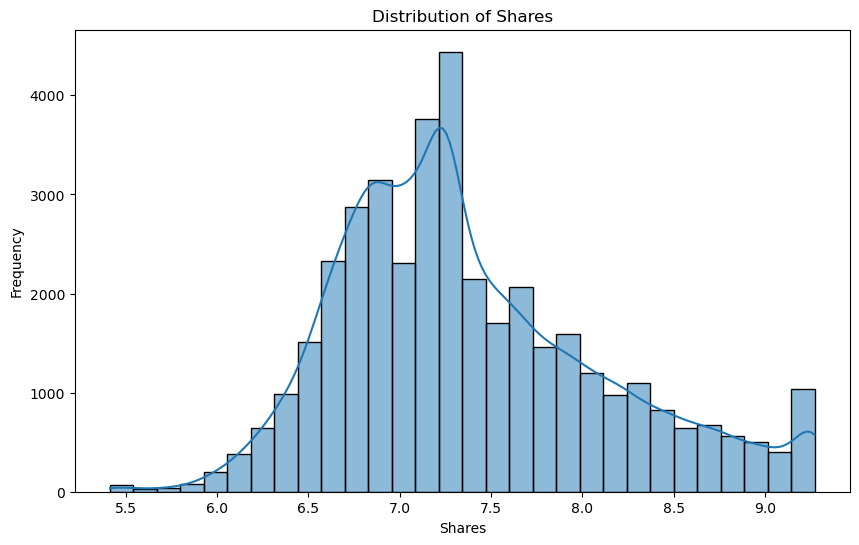

In [113]:
# Visualize data using plots
plt.figure(figsize=(10, 6))
sns.histplot(df3[' shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

### B. Box Plot

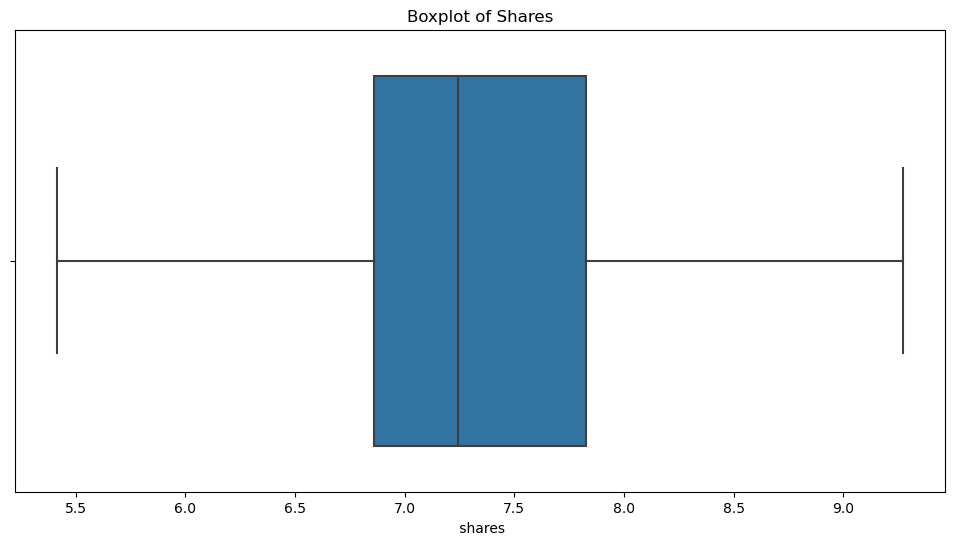

In [115]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=' shares', data=df3)
plt.title('Boxplot of Shares')
plt.show()

#### The simple boxplot will help you identify if there are any extreme values (outliers)

### Correlation 

In [126]:
numeric_data = df3.select_dtypes(include = ['int64','float64'])
correlation_matrix = numeric_data.corr().abs()
correlation_matrix

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,0.237293,0.040349,0.126300,0.110526,0.107059,0.047938,0.026800,0.181662,0.171631,...,0.009115,0.076157,0.019847,0.062175,0.066063,0.018402,NaN,0.013339,0.008900,0.024094
n_tokens_title,0.237293,1.000000,0.001102,0.015718,0.019093,0.012322,0.060318,0.035494,0.012577,0.102732,...,0.022494,0.019115,0.033118,0.028346,0.009337,0.112117,NaN,0.155151,0.083393,0.041576
n_tokens_content,0.040349,0.001102,1.000000,0.712228,0.704427,0.547015,0.503720,0.221848,0.329021,0.085286,...,0.364125,0.490340,0.248520,0.511969,0.141747,0.018978,NaN,0.021229,0.012847,0.012636
n_unique_tokens,0.126300,0.015718,0.712228,1.000000,0.728492,0.847296,0.295844,0.085868,0.338961,0.073386,...,0.319377,0.292880,0.063127,0.317709,0.237513,0.017722,NaN,0.021131,0.010373,0.045887
n_non_stop_words,0.110526,0.019093,0.704427,0.728492,1.000000,0.576028,0.342997,0.054301,0.253018,0.045410,...,0.340729,0.332872,0.128089,0.375540,0.269353,0.013574,NaN,0.010671,0.017862,0.007967
n_non_stop_unique_tokens,0.107059,0.012322,0.547015,0.847296,0.576028,1.000000,0.351939,0.129726,0.353264,0.078974,...,0.220095,0.232410,0.040896,0.228943,0.154731,0.007672,NaN,0.005740,0.015273,0.062088
num_hrefs,0.047938,0.060318,0.503720,0.295844,0.342997,0.351939,1.000000,0.318370,0.255704,0.074633,...,0.176826,0.364933,0.215090,0.330782,0.012558,0.016971,NaN,0.009936,0.028462,0.071797
num_self_hrefs,0.026800,0.035494,0.221848,0.085868,0.054301,0.129726,0.318370,1.000000,0.144885,0.034363,...,0.084167,0.164211,0.113456,0.118339,0.078752,0.016309,NaN,0.011769,0.013757,0.034259
num_imgs,0.181662,0.012577,0.329021,0.338961,0.253018,0.353264,0.255704,0.144885,1.000000,0.081519,...,0.112602,0.175248,0.078324,0.187006,0.030141,0.002617,NaN,0.009606,0.003342,0.057453
num_videos,0.171631,0.102732,0.085286,0.073386,0.045410,0.078974,0.074633,0.034363,0.081519,1.000000,...,0.049178,0.048014,0.019603,0.003330,0.019335,0.033638,NaN,0.007025,0.028709,0.027843


C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


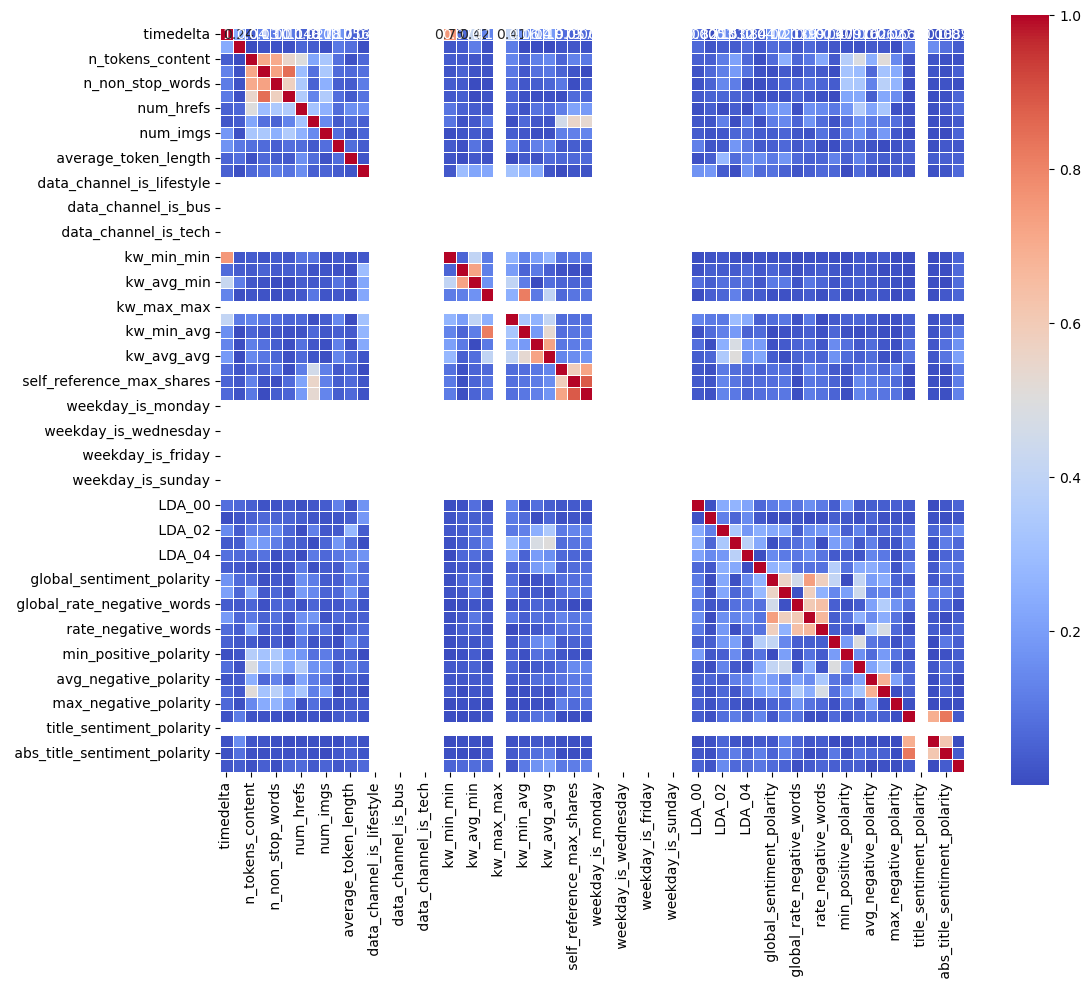

In [128]:
plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm' , square = True , linewidth = .5)
plt.show()

#### Highly Correlated Features: There are clusters of features with high correlation (close to 1 or -1). This means that some features have strong linear relationships with each other, potentially making them redundant in a predictive model. For example, features like kw_min_avg, kw_avg_avg, self_reference_max_shares, and self_reference_avg_shares often show higher correlations with each other. These could be candidates for removal or dimensionality reduction to avoid multicollinearity.

#### Low Correlation with Target (shares): The target variable (shares or equivalent) appears to have relatively low correlation with most of the other features, meaning no single feature stands out as a very strong predictor of the target by itself. This could indicate that the target is likely influenced by a combination of multiple features rather than any individual one.

#### Groups by Topic or Sentiment: Features related to topics (e.g., data_channel_is_entertainment, data_channel_is_bus) and sentiment/polarity (e.g., global_sentiment_polarity, rate_positive_words) tend to group together, showing some intra-group correlations. This suggests that news topics and sentiment might affect each other, which could be useful information for understanding the dataset.

#### Potential Multicollinearity Issue: The presence of several strongly correlated features can lead to multicollinearity, which may negatively affect some machine learning algorithms (e.g., linear models). It could be helpful to use feature selection techniques or dimensionality reduction (like PCA) to mitigate this issue.

In [130]:
# Step 2: Identify pairs of features with a high correlation
high_correlation_threshold = 0.9
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)  # Keep only the upper triangle of the correlation matrix

# Find feature pairs with correlation above the threshold
high_correlation_pairs = [
    (column, index) 
    for column in upper_triangle.columns 
    for index in upper_triangle.index
    if upper_triangle.loc[index, column] > high_correlation_threshold
]

# Step 3: Drop one feature from each pair to reduce redundancy
features_to_drop = set()
for column1, column2 in high_correlation_pairs:
    features_to_drop.add(column2)  # Keep the first feature and drop the second

df3_reduced = df3.drop(columns=features_to_drop)  # DataFrame with reduced features

print("Features to drop due to high correlation:", features_to_drop)
print("Data after removing highly correlated features:\n", df3_reduced.head())

Features to drop due to high correlation: set()
Data after removing highly correlated features:
                                                  url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0          14.798649          0.814613                1.0   
1              9.0          15.968719          0.777652                1.0   
2              9.0          14.525839          0.758373                1.0   
3              9.0          23.043437          0.709780                1.0   
4             13.0          32.741411          0.644706                1.0   

    n_non_stop_unique_tok

#### Explore Non-linear Relationships: Since linear correlation is low with shares, it might be beneficial to explore non-linear relationships or interactions between features.

In [134]:
df3_selected_features =df3[[
    ' n_tokens_title', 
    ' n_tokens_content', 
    ' n_unique_tokens', 
    ' average_token_length', 
    ' num_hrefs', 
    ' num_imgs', 
    ' num_videos', 
    ' num_keywords', 
    ' global_subjectivity', 
    ' global_sentiment_polarity', 
    ' global_rate_positive_words', 
    ' global_rate_negative_words', 
    ' self_reference_avg_sharess', 
    ' self_reference_min_shares', 
    ' self_reference_max_shares', 
    ' weekday_is_monday', 
    ' weekday_is_tuesday', 
    ' weekday_is_wednesday', 
    ' weekday_is_thursday', 
    ' weekday_is_friday', 
    ' weekday_is_saturday', 
    ' weekday_is_sunday', 
    ' is_weekend', 
    ' kw_avg_max', 
    ' kw_avg_min', 
    ' data_channel_is_lifestyle', 
    ' data_channel_is_entertainment', 
    ' data_channel_is_bus', 
    ' data_channel_is_socmed', 
    ' data_channel_is_tech', 
    ' data_channel_is_world',
    ' shares'  # Include target variable
]]

# Display the extracted relevant features
print(df3_selected_features.head())

    n_tokens_title   n_tokens_content   n_unique_tokens  \
0             12.0          14.798649          0.814613   
1              9.0          15.968719          0.777652   
2              9.0          14.525839          0.758373   
3              9.0          23.043437          0.709780   
4             13.0          32.741411          0.644706   

    average_token_length   num_hrefs   num_imgs   num_videos   num_keywords  \
0             413.649982    2.000000        1.0          0.0            5.0   
1             492.075229    1.732051        1.0          0.0            4.0   
2             330.770177    1.732051        1.0          0.0            6.0   
3             333.831219    3.000000        1.0          0.0            7.0   
4             414.426369    4.358899        1.0          0.0            7.0   

    global_subjectivity   global_sentiment_polarity  ...   is_weekend  \
0              1.035903                    0.092562  ...          0.0   
1              0.540573 

### Imputing Missing Values

In [136]:
df4 = df3_selected_features

In [145]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Separate features and target
X = df4.drop(columns=[' shares'])
y = df4[' shares']

# Impute missing values with the mean (you could also use 'median' or 'most_frequent')
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Check if there are any remaining NaNs (should be none)
print(X_imputed.isna().sum().sum())  # Should print 0 if all NaNs are handled

# Now proceed with SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X_imputed, y)
X_kbest = selector.transform(X_imputed)

selected_features = X_imputed.columns[selector.get_support()]
X_kbest_df4 = pd.DataFrame(X_kbest, columns=selected_features)


# Fit a RandomForestRegressor to evaluate feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_kbest_df4, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df4 = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df4)

0
                       Feature  Importance
9                   kw_avg_min    0.166537
3          global_subjectivity    0.144062
4    global_sentiment_polarity    0.142402
5   global_rate_positive_words    0.142291
6   self_reference_avg_sharess    0.092209
0                    num_hrefs    0.084487
7    self_reference_min_shares    0.071365
8    self_reference_max_shares    0.062247
2                 num_keywords    0.059398
1                     num_imgs    0.035001


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Step 1: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_kbest_df4, y, test_size=0.2, random_state=42)

# Step 2: Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Transform test data (using the same scaler)

# Convert back to DataFrame if needed for further processing
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_features)

# Print scaled features' DataFrame shapes to confirm scaling
print("X_train_scaled_df shape:", X_train_scaled_df.shape)
print("X_test_scaled_df shape:", X_test_scaled_df.shape)

X_train shape: (31715, 10)
X_test shape: (7929, 10)
y_train shape: (31715,)
y_test shape: (7929,)
X_train_scaled_df shape: (31715, 10)
X_test_scaled_df shape: (7929, 10)


### Split Data into Training and Testing Sets

### Feature Scaling:
Apply standardscaler to numerical features

## Build the ML Model:
Implement multiple machine learning algorithms for regression tasks.

### 1.Linear Regression
Linear regression is a regression technique. It is used to model the relationship between a dependent variable (the target) and one or more independent variables (features) by fitting a linear equation to the observed data.

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the scaled training data
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
r2 = r2_score(y_test, y_pred_linear)

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.58
Mean Squared Error (MSE): 0.53
Root Mean Squared Error (RMSE): 0.73
R2 Score: 0.04


### 2.Support Vector Regressor (SVR)
A type of Support Vector Machine that uses the principles of maximizing the margin to create a decision boundary for regression tasks. It attempts to fit the best line within a predefined margin of tolerance.

In [160]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the SVR model with a kernel (default is 'rbf' for non-linear)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the SVR model on the scaled training data
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = mean_squared_error(y_test, y_pred_svr, squared=False)
r2 = r2_score(y_test, y_pred_svr)

# Print evaluation metrics
print("Support Vector Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Support Vector Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.56
Mean Squared Error (MSE): 0.53
Root Mean Squared Error (RMSE): 0.73
R2 Score: 0.04


In [ ]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

### 3. Random Forest Regression
An ensemble learning method that constructs multiple decision trees during training and outputs the average prediction from all trees for regression tasks. It reduces overfitting compared to a single decision tree.

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}")

Random Forest Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.58
Mean Squared Error (MSE): 0.53
Root Mean Squared Error (RMSE): 0.73
R2 Score: 0.04


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

### 4.Gradient Boosting Regressor
An ensemble technique that builds models sequentially, each new model correcting the errors of the previous one. It uses decision trees as base learners.



In [172]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

### 5.k-Nearest Neighbors Regressor (k-NN)
A non-parametric method that predicts the value of a data point based on the average (or weighted average) of its k nearest neighbors in the feature space.

In [174]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

### 6.Multi-layer Perceptron (MLP) Regressor
The MLP regressor is capable of modeling complex non-linear relationships. It's flexible and can approximate any continuous function given enough data and appropriate architecture.

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(max_iter=1000)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

## 12.Model Evaluation
Model evaluation is a crucial step in the machine learning workflow, particularly in regression tasks. It helps determine how well your model performs and its predictive accuracy. Here are the common metrics and techniques used for evaluating regression models:

Mean Absolute Error (MAE):The average of the absolute differences between predicted and actual values.
Mean Squared Error (MSE):The average of the squared differences between predicted and actual values.
Root Mean Squared Error (RMSE):The square root of the Mean Squared Error.
R-squared (R² Score):The proportion of variance in the dependent variable that can be predicted from the independent variables.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1. Linear Regression Model Evaluation

In [164]:
print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linear)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_linear))}")
print(f"R² Score: {r2_score(y_test, y_pred_linear)}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.5779714003080446
Mean Squared Error (MSE): 0.5315436359547956
Root Mean Squared Error (RMSE): 0.7290703916322453
R² Score: 0.037656302307502165


### 2.Support Vector Regression Model Evaluation

In [166]:
print("\nSupport Vector Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_svr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_svr)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_svr))}")
print(f"R² Score: {r2_score(y_test, y_pred_svr)}")


Support Vector Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.5554548862059399
Mean Squared Error (MSE): 0.5325643776652524
Root Mean Squared Error (RMSE): 0.7297700854825803
R² Score: 0.03580828027208549


### 3. Random Forest Regression Model Evaluation

In [168]:
print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")


Random Forest Regressor Model Evaluation:
Mean Absolute Error (MAE): 0.5773656532847077
Mean Squared Error (MSE): 0.5313527532394121
Root Mean Squared Error (RMSE): 0.7289394715882878
R² Score: 0.03800188969811724


### 4.Gradient Boosting Regressor Model Evaluation

In [170]:
print("\nGradient Boosting Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_gb)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gb)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_gb))}")
print(f"R² Score: {r2_score(y_test, y_pred_gb)}")



Gradient Boosting Regressor Model Evaluation:


NameError: name 'y_pred_gb' is not defined

### 5.k-Nearest Neighbors Regressor Model Evaluation (k-NN)

In [ ]:
print("\nk-Nearest Neighbors Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_knn)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_knn)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_knn))}")
print(f"R² Score: {r2_score(y_test, y_pred_knn)}")

### 6.Multi-layer Perceptron (MLP) Regressor Model Evaluation

In [ ]:
print("\nMulti-Layer Perceptron Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_mlp)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_mlp)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_mlp))}")
print(f"R² Score: {r2_score(y_test, y_pred_mlp)}")

In [ ]:
import seaborn as sns
import pandas as pd

# Combine selected features with the target variable
data_for_pairplot = pd.concat([X_kbest_df, y], axis=1)

# Rename the target column for clarity (optional)
data_for_pairplot = data_for_pairplot.rename(columns={' shares': 'Popularity'})

# Draw the pairplot
sns.pairplot(data_for_pairplot, hue='Popularity', palette='coolwarm')